# Trimester-specific cis-e/iso/sQTL
- 0. tri conditional eQTL
- 1. HCP plots: tri e/iso/sQTL
- 2. tri e/iso/sGene comparison
- 3. h2 analysis: gene and splicing; fetal vs adult; fetal sliding window; pLI vs cish2; (7/31/2023 update, for revision, cell type marker genes from Polioudakis expression in age batches, see new ipynb)
- 4. tri-specific eGene
- 5. tri aFC
- old h2 results, trimester specific covariates

In [1]:
library(tidyverse)
library(data.table)
# library(VennDiagram)
# library(ggsignif)
# library(ggsci)
# library(ggpubr)
# library(patchwork)
library(gridExtra)
library(grid)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### Tri conditional eQTL

In [6]:
tri1 <- read.table("../results/tri1_conditional_25hcp/conditional_top_variants.txt")
tri2 <- read.table("../results/tri2_conditional_15hcp/conditional_top_variants.txt")

In [7]:
dim(tri1)
dim(tri2)

[1] 4452   20

[1] 2435   20

In [9]:
table(tri1$V20)
table(tri2$V20)


   0    1 
   2 4450 


   1 
2435 

In [10]:
tri1 <- tri1 %>% filter(V20 == 1)

In [11]:
table(tri1$V12)
table(tri2$V12)


   0    1    2    3 
4103  318   26    3 


   0    1    2 
2314  117    4 

In [12]:
df1 <- data.frame("gene" <- unique(tri1$V1),
                  "num_rank" <- NA)
for (i in 1:nrow(df1)) {
  gene <- df1[i,1]
  df1[i,2] <- max(tri1[tri1$V1==gene,12]) + 1
}

df2 <- data.frame("gene" <- unique(tri2$V1),
                  "num_rank" <- NA)
for (i in 1:nrow(df2)) {
  gene <- df2[i,1]
  df2[i,2] <- max(tri2[tri2$V1==gene,12]) + 1
}

In [27]:
names(df1) <-c("gene","num_rank")
table(df1$num_rank)

# ggplot(df1, aes(x = num_rank)) +
#   geom_bar(fill = "#0072B5FF") +
#   scale_x_continuous(breaks = seq(1,4,by=1)) +
#   labs(x = "Number of independent cis-eQTL groups", y = "Gene count") +
#   ggtitle("Tri1 conditional cis-eQTL") +
#   theme_bw() +
#   theme(axis.text = element_text(size = 16),
#         axis.title = element_text(size = 18),
#         plot.title = element_text(size = 18, face = "bold", hjust = 0.5))


   1    2    3    4 
3787  292   23    3 

In [28]:
names(df2) <-c("gene","num_rank")
table(df2$num_rank)

# ggplot(df2, aes(x = num_rank)) +
#   geom_bar(fill = "#E18727FF") +
#   scale_x_continuous(breaks = seq(1,4,by=1)) +
#   labs(x = "Number of independent cis-eQTL groups", y = "Gene count") +
#   ggtitle("Tri2 conditional cis-eQTL") +
#   theme_bw() +
#   theme(axis.text = element_text(size = 16),
#         axis.title = element_text(size = 18),
#         plot.title = element_text(size = 18, face = "bold", hjust = 0.5))


   1    2    3 
2197  113    4 

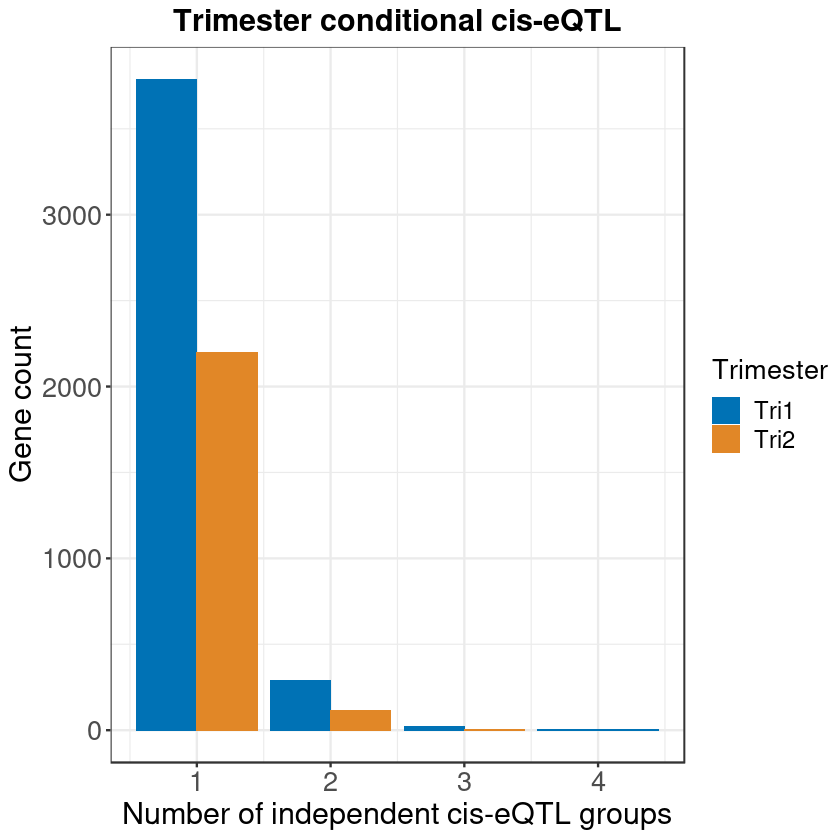

In [25]:
df1$Trimester <- "Tri1"
df2$Trimester <- "Tri2"
df <- rbind(df1, df2)

ggplot(df, aes(x = num_rank, fill = Trimester)) +
  geom_bar(position = "dodge") +
  scale_x_continuous(breaks = seq(1,4,by=1)) +
  labs(x = "Number of independent cis-eQTL groups", y = "Gene count") +
  ggtitle("Trimester conditional cis-eQTL") +
  theme_bw() +
  theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)) +
  scale_fill_manual(values = c("#0072B5FF", "#E18727FF"))

In [26]:
ggsave("../figures/tri_cond.pdf", width = 6, height = 6)

**Now compare eGenes #eQTL**

### 1: HCP titration

In [3]:
results <- read.csv("../data/eur/chuanjiao/hcps-plots.csv")

In [4]:
colnames(results)[3] <- "Group"
results[1:10,3] <- "EUR trimester 1, n=137"
results[11:20,3] <- "EUR trimester 2, n=141"

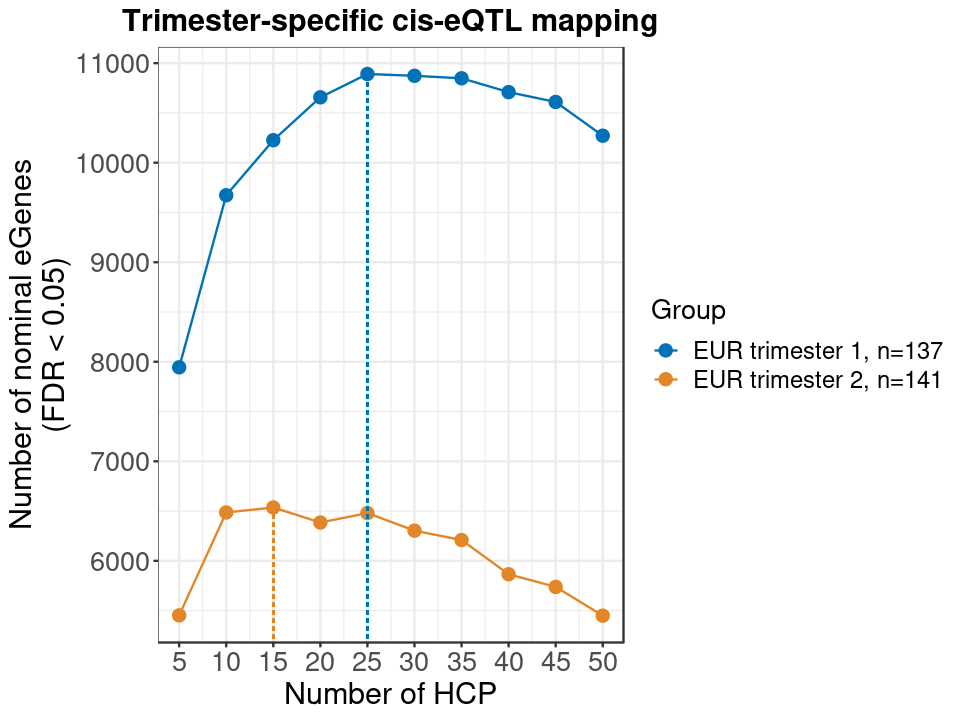

In [12]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(results, aes(x = X, y = value, color = Group)) +
    geom_point(size = 3) +
    geom_line() +
    scale_x_continuous(breaks = seq(0,55,by = 5)) +
    geom_segment(x = 15, y = 0, xend = 15, yend = 6536, color = "#E18727FF", linetype = "dashed") +
    geom_segment(x = 25, y = 0, xend = 25, yend = 10891, color = "#0072B5FF", linetype = "dashed") +
    labs(x = "Number of HCP", y = "Number of nominal eGenes\n(FDR < 0.05)",
         title = "Trimester-specific cis-eQTL mapping") +
    theme_bw() +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18),
          plot.title = element_text(size=18, face="bold", hjust = 0.5),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_color_manual(values = c("#0072B5FF", "#E18727FF"))

In [13]:
ggsave("../figures/tri_nominal.pdf", width = 8, height = 6)

In [14]:
df_1 <- data.frame("HCP" = seq(5, 50, 5),
                   "Count" = NA)
for (i in seq(5, 50, 5)) {
    df_1[i/5, "Count"] <- read.table(paste0("../../sqtl_new/results/tri1_nominal_", i, "hcp/significant_feature_count.txt"))[,1]
}
df_2 <- data.frame("HCP" = seq(5, 50, 5),
                   "Count" = NA)
for (i in seq(5, 50, 5)) {
    df_2[i/5, "Count"] <- read.table(paste0("../../sqtl_new/results/tri2_nominal_", i, "hcp/significant_feature_count.txt"))[,1]
}

In [15]:
df <- rbind(df_1, df_2)
df$Group <- c(rep("EUR trimester 1, n=141", 10), rep("EUR trimester 2, n=143", 10))

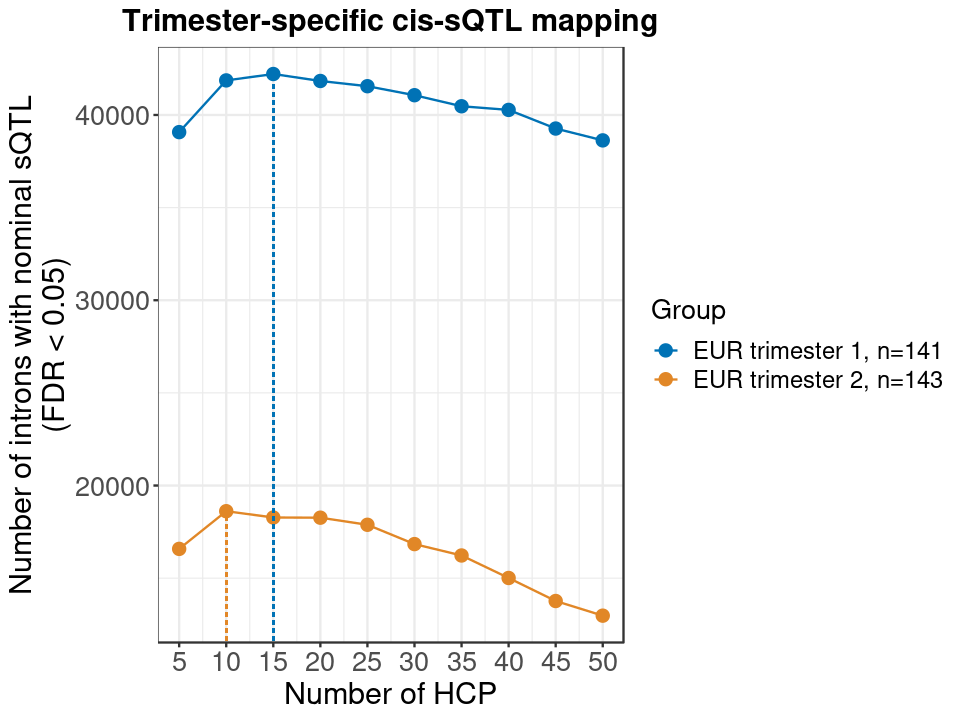

In [17]:
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(df, aes(x = HCP, y = Count, color = Group)) +
    geom_point(size = 3) +
    geom_line() +
    scale_x_continuous(breaks = seq(0,55,by = 5)) +
    geom_segment(x = 15, y = 0, xend = 15, yend = 42210, color = "#0072B5FF", linetype = "dashed") +
    geom_segment(x = 10, y = 0, xend = 10, yend = 18614, color = "#E18727FF", linetype = "dashed") +
    labs(x = "Number of HCP", y = "Number of introns with nominal sQTL\n(FDR < 0.05)",
         title = "Trimester-specific cis-sQTL mapping") +
    theme_bw() +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18),
          plot.title = element_text(size=18, face="bold", hjust = 0.5),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_color_manual(values = c("#0072B5FF", "#E18727FF"))

In [18]:
ggsave("../../sqtl_new/figures/tri_nominal_sqtl.pdf", width = 8, height = 6)

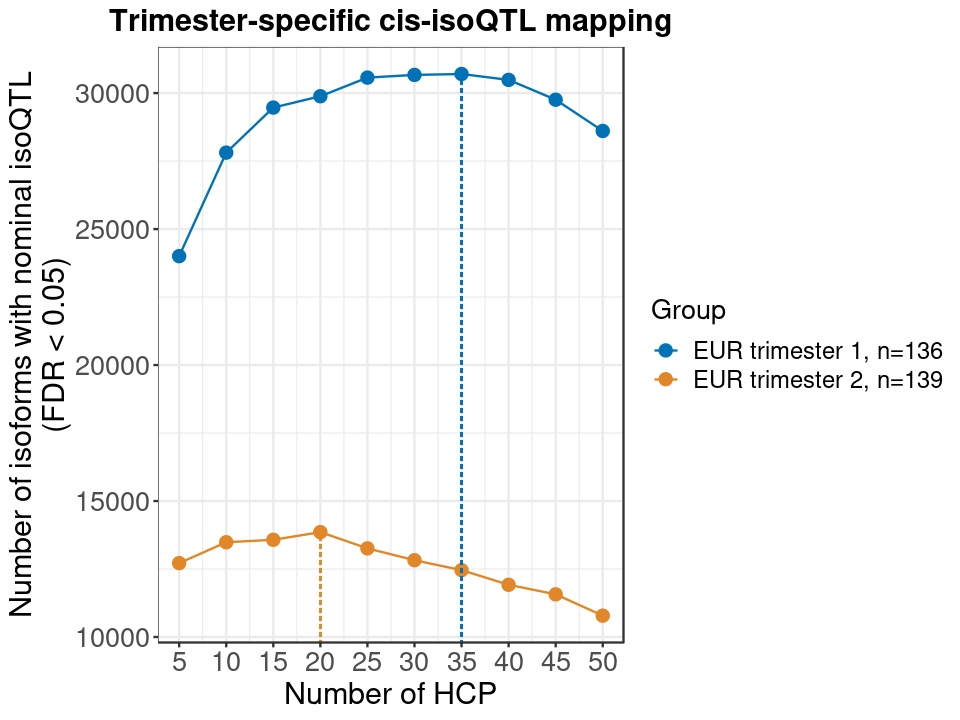

In [4]:
df_1 <- data.frame("HCP" = seq(5, 50, 5),
                   "Count" = NA)
for (i in seq(5, 50, 5)) {
    df_1[i/5, "Count"] <- read.table(paste0("../../isoqtl_new/results/tri1_nominal_", i, "hcp/significant_feature_count.txt"))[,1]
}
df_2 <- data.frame("HCP" = seq(5, 50, 5),
                   "Count" = NA)
for (i in seq(5, 50, 5)) {
    df_2[i/5, "Count"] <- read.table(paste0("../../isoqtl_new/results/tri2_nominal_", i, "hcp/significant_feature_count.txt"))[,1]
}

df <- rbind(df_1, df_2)
df$Group <- c(rep("EUR trimester 1, n=136", 10), rep("EUR trimester 2, n=139", 10))


options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(df, aes(x = HCP, y = Count, color = Group)) +
    geom_point(size = 3) +
    geom_line() +
    scale_x_continuous(breaks = seq(0,55,by = 5)) +
    geom_segment(x = 35, y = 0, xend = 35, yend = 30701, color = "#0072B5FF", linetype = "dashed") +
    geom_segment(x = 20, y = 0, xend = 20, yend = 13857, color = "#E18727FF", linetype = "dashed") +
    labs(x = "Number of HCP", y = "Number of isoforms with nominal isoQTL\n(FDR < 0.05)",
         title = "Trimester-specific cis-isoQTL mapping") +
    theme_bw() +
    theme(axis.text = element_text(size=16),
          axis.title = element_text(size=18),
          plot.title = element_text(size=18, face="bold", hjust = 0.5),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_color_manual(values = c("#0072B5FF", "#E18727FF"))

In [5]:
ggsave("../../isoqtl_new/figures/tri_nominal_isoqtl.pdf", width = 8, height = 6)

### 2: e/iso/sGene comparison

**2-1: eQTL, eGene overlap**

In [2]:
tri1 <- fread("../results/eur_trimester/sig_pheno_trimester1.txt", data.table = F)
tri2 <- fread("../results/eur_trimester/sig_pheno_trimester2.txt", data.table = F)

In [3]:
bulk <- fread("../results/mixed_perm_90hcp/sig_pheno.txt", data.table = F)

In [4]:
length(unique(bulk$pid)) #n1

[1] 10094

In [5]:
sum(unique(bulk$pid) %in% unique(tri1$pid)) #n12
sum(unique(tri1$pid) %in% unique(tri2$pid)) #n23
sum(unique(bulk$pid) %in% unique(tri2$pid)) #n13
length(Reduce(intersect, list(unique(bulk$pid),
                              unique(tri1$pid),
                              unique(tri2$pid)))) #n123

[1] 3080

[1] 1261

[1] 1757

[1] 1232

In [20]:
sum(unique(tri1$pid) %in% unique(tri2$pid))
length(unique(tri1$pid)) #n2
length(unique(tri2$pid)) #n3
dim(tri1)
dim(tri2)

[1] 1261

[1] 4211

[1] 2220

[1] 4211   13

[1] 2220   13

png 
  2

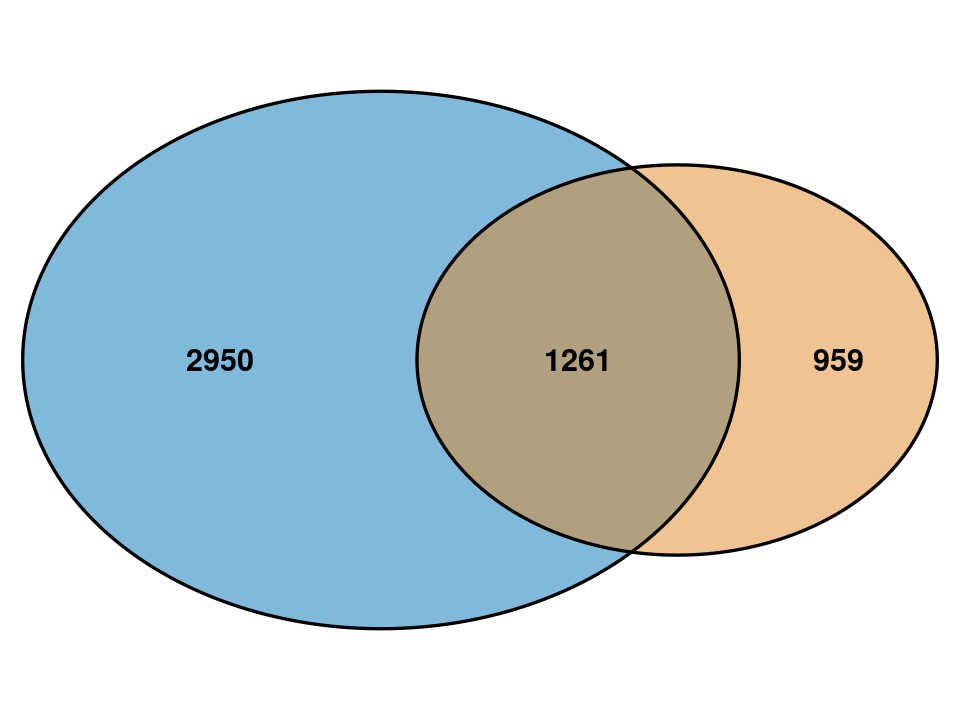

In [20]:
# area1, area2, n12
venn.plot <- draw.pairwise.venn(4211, 2220, 1261, 
                              fill = c("#0072B5FF", "#E18727FF"),
                              alpha = c(.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",3),
                              category = c("", ""), 
                              scaled = TRUE,
                              )
pdf("../figures/tri_egene.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

png 
  2

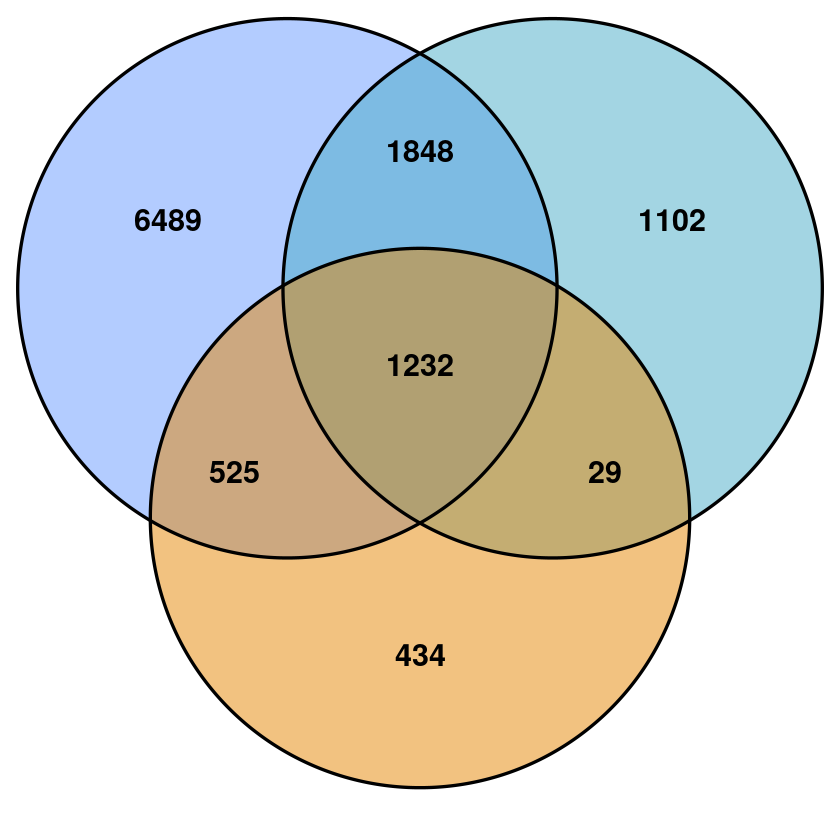

In [6]:
myCol <- c("#6699FF", "#46ACC8", "#E58601")
# area1, area2, area3, n12, n23, n13, n123
venn.plot <- draw.triple.venn(10094, 4211, 2220, 3080, 1261, 1757, 1232, 
                              fill = myCol,
                              alpha = c(.5,.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",7),
                              category = c("", "", ""), 
                              scaled = TRUE)
pdf("../figures/bulk_tri_egene.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

**2-2: sQTL, intron overlap**

In [7]:
tri1 <- fread("../../sqtl_new/results/tri1_perm_15hcp/sig_pheno.txt", data.table = F)
tri2 <- fread("../../sqtl_new/results/tri2_perm_10hcp/sig_pheno.txt", data.table = F)

In [14]:
bulk <- fread("../../sqtl_new/results/mixed_grp_perm_40hcp_1e6/group.perm.genes.txt.gz", data.table = F)
bulk <- bulk %>% filter(qval < 0.05)
dim(bulk)
length(unique(bulk$group_id))

[1] 8191   21

[1] 7490

In [3]:
sum(unique(tri1$pid) %in% unique(tri2$pid))
length(unique(tri1$pid))
length(unique(tri2$pid))
dim(tri1)
dim(tri2)

[1] 3338

[1] 14193

[1] 5348

[1] 14193    13

[1] 5348   13

png 
  2

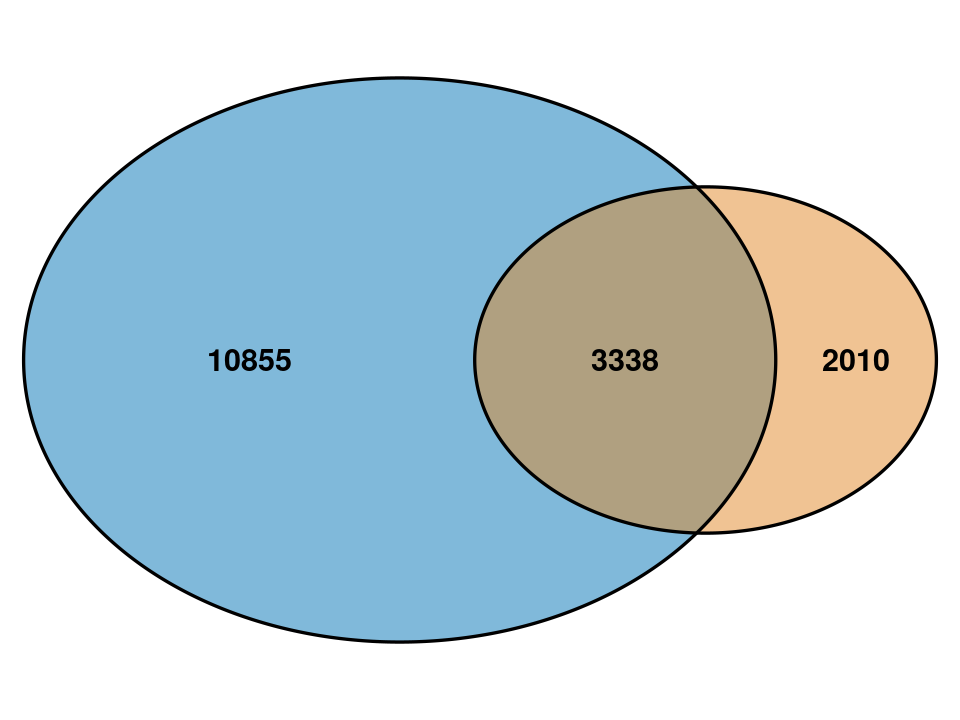

In [21]:
# area1, area2, n12
venn.plot <- draw.pairwise.venn(14193, 5348, 3338, 
                              fill = c("#0072B5FF", "#E18727FF"),
                              alpha = c(.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",3),
                              category = c("", ""), 
                              scaled = TRUE,
                              )
pdf("../../sqtl_new/figures/tri_intron.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

**2-3: sQTL, sGene overlap**

In [9]:
load("../../sqtl_new/leafviz_annot/all.introns.tested.RData")

In [10]:
tri1 <- tri1 %>% left_join(pheno, by = c("pid" = "ID"))
tri2 <- tri2 %>% left_join(pheno, by = c("pid" = "ID"))
# head(tri1)

In [11]:
tri1 <- tri1 %>% separate(ensemblID, c("ensg","version"), sep='[.]', remove = FALSE)
tri2 <- tri2 %>% separate(ensemblID, c("ensg","version"), sep='[.]', remove = FALSE)

In [23]:
write.table(tri1, "../../sqtl_new/results/tri1_perm_15hcp/sig_pheno_gene.txt", col.names = T, row.names = F, sep = "\t", quote = F)
write.table(tri2, "../../sqtl_new/results/tri2_perm_10hcp/sig_pheno_gene.txt", col.names = T, row.names = F, sep = "\t", quote = F)

In [24]:
length(unique(tri1$ensg))
length(unique(tri2$ensg))
length(unique(tri1$ensemblID))
length(unique(tri2$ensemblID))
length(unique(tri1$gene))
length(unique(tri2$gene))

[1] 5313

[1] 2319

[1] 5313

[1] 2319

[1] 5311

[1] 2319

In [25]:
sum(unique(tri1$ensemblID) == '.')
sum(unique(tri2$ensemblID) == '.')
sum(unique(tri1$gene) == '.')
sum(unique(tri2$gene) == '.')

[1] 1

[1] 1

[1] 1

[1] 1

In [20]:
sum(pheno$gene == '.')

[1] 10043

In [26]:
sum(unique(tri1$ensemblID) %in% unique(tri2$ensemblID))

[1] 1763

png 
  2

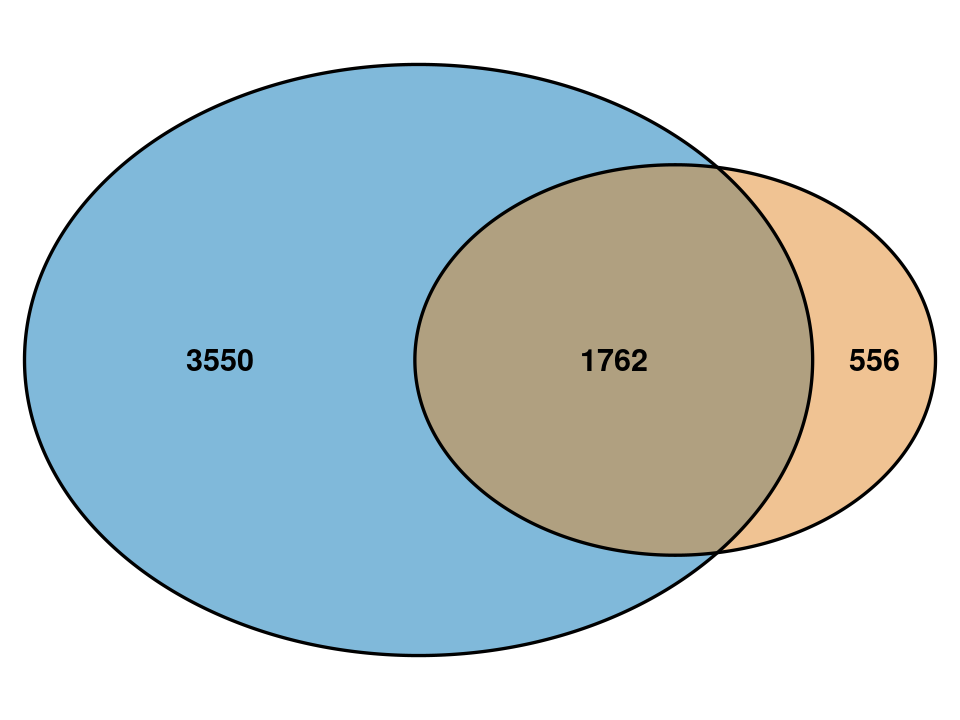

In [22]:
# area1, area2, n12
venn.plot <- draw.pairwise.venn(5312, 2318, 1762, 
                              fill = c("#0072B5FF", "#E18727FF"),
                              alpha = c(.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",3),
                              category = c("", ""), 
                              scaled = TRUE,
                              )
pdf("../../sqtl_new/figures/tri_sgene.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

In [15]:
bulk <- bulk %>% separate(group_id, c("ensg", "version"), remove = FALSE, sep = "[.]")

In [16]:
length(unique(bulk$group_id))
length(unique(bulk$ensg))

[1] 7490

[1] 7490

In [17]:
sum(bulk$group_id == '.')

[1] 0

In [18]:
sum(unique(bulk$ensg) %in% unique(tri1$ensg)) #n12
sum(unique(tri1$ensg) %in% unique(tri2$ensg)) #n23
sum(unique(bulk$ensg) %in% unique(tri2$ensg)) #n13
length(Reduce(intersect, list(unique(bulk$ensg),
                              unique(tri1$ensg),
                              unique(tri2$ensg)))) #n123

[1] 3796

[1] 1763

[1] 1876

[1] 1596

png 
  2

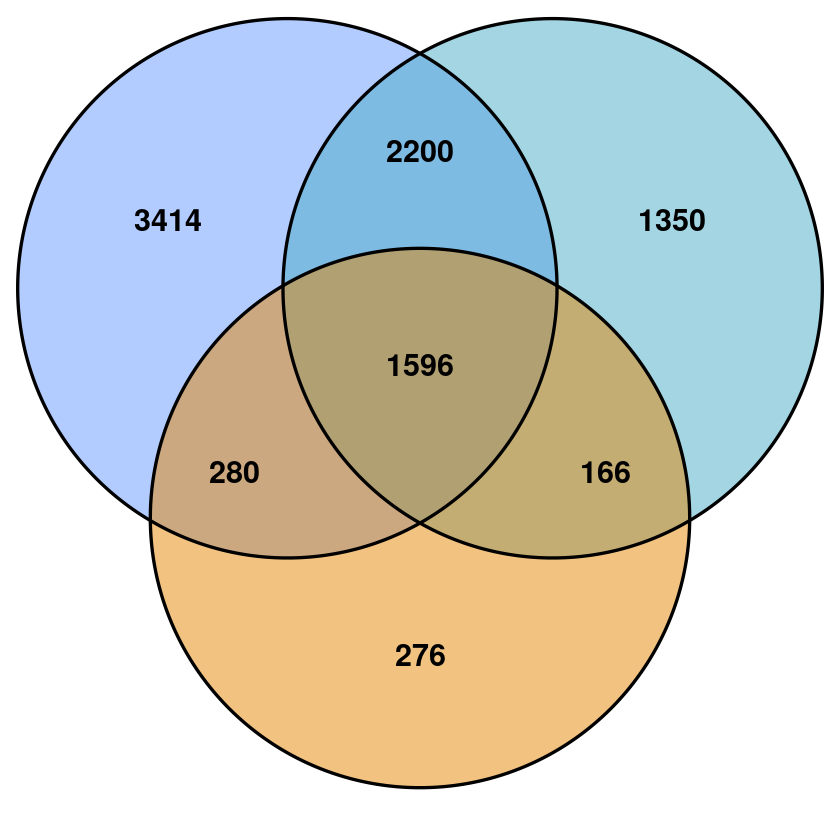

In [19]:
myCol <- c("#6699FF", "#46ACC8", "#E58601")
# area1, area2, area3, n12, n23, n13, n123
venn.plot <- draw.triple.venn(7490, 5312, 2318, 3796, 1762, 1876, 1596, 
                              fill = myCol,
                              alpha = c(.5,.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",7),
                              category = c("", "", ""), 
                              scaled = TRUE)
pdf("../../sqtl_new/figures/bulk_tri_sgene.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

**2-4: isoQTL**

In [20]:
tri1 <- read.table("../../isoqtl_new/results/tri1_perm_35hcp/sig_pheno.txt", header = T)
tri2 <- read.table("../../isoqtl_new/results/tri2_perm_20hcp/sig_pheno.txt", header = T)

In [21]:
bulk <- fread("../../isoqtl_new/results/mixed_grp_perm_70hcp/group.perm.genes.txt.gz", data.table = F)
bulk <- bulk %>% filter(qval < 0.05)
dim(bulk)
length(unique(bulk$group_id))

[1] 11861    21

[1] 11845

In [9]:
sum(unique(tri1$pid) %in% unique(tri2$pid))
length(unique(tri1$pid))
length(unique(tri2$pid))
dim(tri1)
dim(tri2)

[1] 2564

[1] 10881

[1] 4179

[1] 10881    13

[1] 4179   13

png 
  2

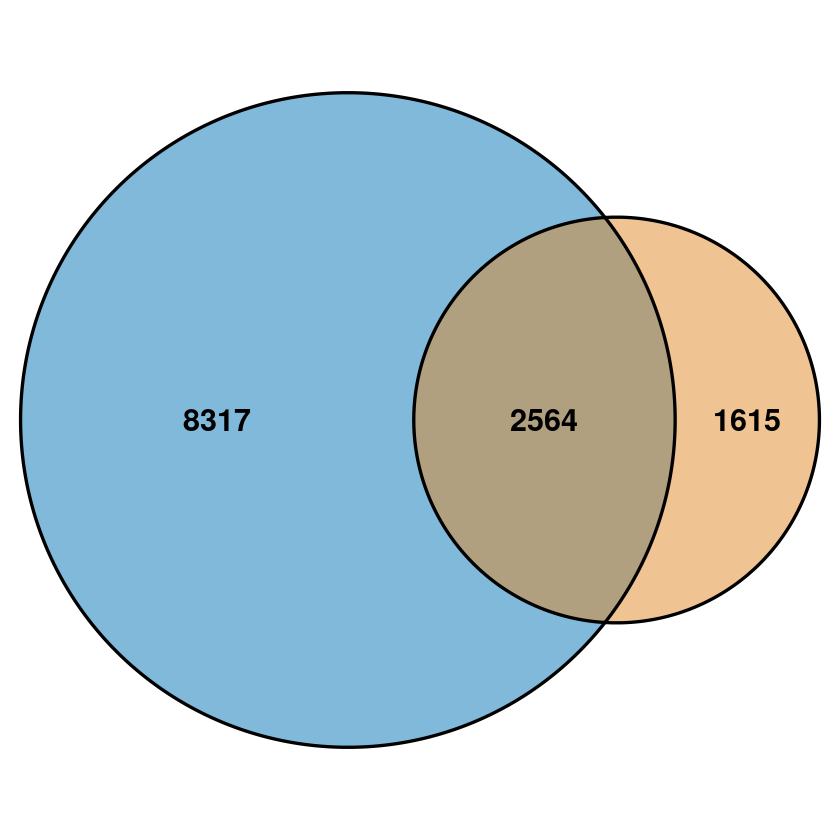

In [6]:
# area1, area2, n12
venn.plot <- draw.pairwise.venn(10881, 4179, 2564, 
                              fill = c("#0072B5FF", "#E18727FF"),
                              alpha = c(.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",3),
                              category = c("", ""), 
                              scaled = TRUE,
                              )
pdf("../../isoqtl_new/figures/tri_isoform.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

In [22]:
tx2gene <- read.table("../../salmon/tx2gene_gencode_v33_noGeneVersion.tsv", header = T)

In [23]:
tri1 <- tri1 %>% left_join(tx2gene, by = c("pid" = "Tx"))

In [24]:
tri2 <- tri2 %>% left_join(tx2gene, by = c("pid" = "Tx"))

In [6]:
sum(unique(tri1$Gene) %in% unique(tri2$Gene))
length(unique(tri1$Gene))
length(unique(tri2$Gene))

[1] 2121

[1] 6921

[1] 3047

png 
  2

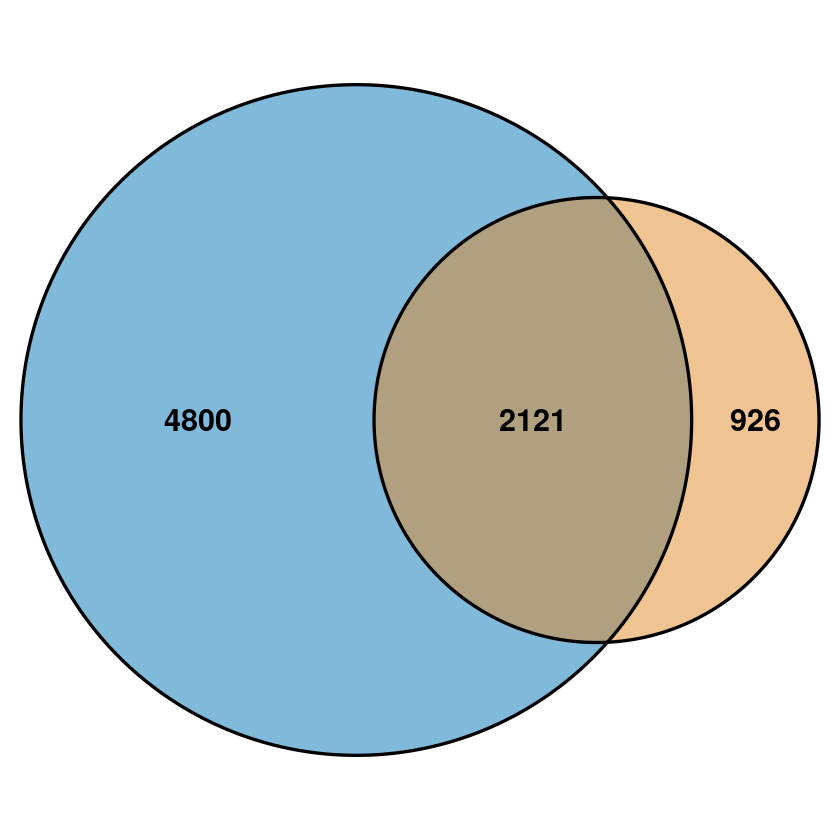

In [15]:
# area1, area2, n12
venn.plot <- draw.pairwise.venn(6921, 3047, 2121, 
                              fill = c("#0072B5FF", "#E18727FF"),
                              alpha = c(.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",3),
                              category = c("", ""), 
                              scaled = TRUE,
                              )
pdf("../../isoqtl_new/figures/tri_isogene.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

In [8]:
write.table(tri1, "../../isoqtl_new/results/tri1_perm_35hcp/sig_pheno_gene.txt", col.names = T, row.names = F, quote = F, sep = "\t")
write.table(tri2, "../../isoqtl_new/results/tri2_perm_20hcp/sig_pheno_gene.txt", col.names = T, row.names = F, quote = F, sep = "\t")

In [26]:
sum(unique(bulk$group_id) %in% unique(tri1$Gene)) #n12
sum(unique(tri1$Gene) %in% unique(tri2$Gene)) #n23
sum(unique(bulk$group_id) %in% unique(tri2$Gene)) #n13
length(Reduce(intersect, list(unique(bulk$group_id),
                              unique(tri1$Gene),
                              unique(tri2$Gene)))) #n123

[1] 5264

[1] 2121

[1] 2590

[1] 2047

png 
  2

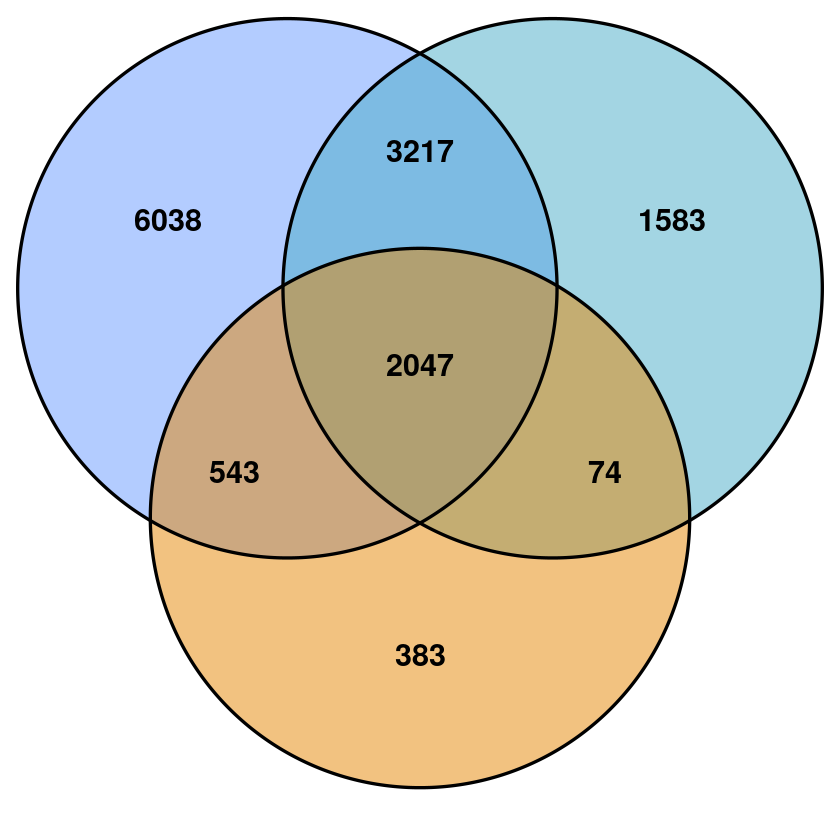

In [27]:
myCol <- c("#6699FF", "#46ACC8", "#E58601")
# area1, area2, area3, n12, n23, n13, n123
venn.plot <- draw.triple.venn(11845, 6921, 3047, 5264, 2121, 2590, 2047, 
                              fill = myCol,
                              alpha = c(.5,.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",7),
                              category = c("", "", ""), 
                              scaled = TRUE)
pdf("../../isoqtl_new/figures/bulk_tri_isogene.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

### 3: h2
- Daniel ran GCTA. EUR gene expression regressed by 50 HCP covaraites, then separate into trimesters
- compare with tri TWAS, which is tri gene expression regressed by tri specific cov; also LDREF only
- SNP_h2 seems to be driven by trans_h2, which has funky bimodal distribution...N too small?
- final supp figure see `tri_h2_supp.ipynb`
- also note from Daniel: fetal gene TSS 1Mb, PEC gene body; fetal intron body

**New results, cis, trans, residual**

In [2]:
adult <- fread("/u/project/gandalm/danieldu/gcta/data/EUR_SPC_gene_HRC_1Mbase_window/output/results/all_variance.txt", data.table = F)

In [3]:
tri1_h2 <- fread("/u/project/gandalm/danieldu/gcta/data/sliding_fetal/hg19_gene_regressed/results/1Mbase_window/1_to_137_1Mbase_window.csv", data.table = F)
tri2_h2 <- fread("/u/project/gandalm/danieldu/gcta/data/sliding_fetal/hg19_gene_regressed/results/1Mbase_window/138_to_280_1Mbase_window.csv", data.table = F)

**List of genes with cish2 drop**
- if the nominal 95% CIs overlap (cish2 +/- 1.96*SE)
- 198 genes drop, 32 genes up

In [4]:
tri_h2 <- tri1_h2 %>% inner_join(tri2_h2, by = "gene")

In [6]:
tri_h2 <- tri_h2 %>% mutate(tri1_cish2_lower = cish2.x - 1.96*cish2se.x,
                            tri1_cish2_upper = cish2.x + 1.96*cish2se.x,
                            tri2_cish2_lower = cish2.y - 1.96*cish2se.y,
                            tri2_cish2_upper = cish2.y + 1.96*cish2se.y)

In [7]:
# genes cish2 drop
drop_cish2 <- tri_h2 %>% filter(tri1_cish2_lower > tri2_cish2_upper)
# genes cish2 increase
increase_cish2 <- tri_h2 %>% filter(tri2_cish2_lower > tri1_cish2_upper)

dim(drop_cish2)
dim(increase_cish2)

[1] 198  27

[1] 32 27

In [2]:
gtf <- fread("../../salmon/gencode.v33lift37.annotation.gene.info.tsv", data.table = F)

In [10]:
drop_cish2 <- drop_cish2 %>% inner_join(gtf, by = c("gene" = "ensg"))

In [12]:
drop_cish2 <- drop_cish2 %>% select(-c(V1, V2, V3, V4, V5, V6, V7, V8, V9, version))

In [15]:
increase_cish2 <- increase_cish2 %>% inner_join(gtf, by = c("gene" = "ensg")) %>%
    select(-c(V1, V2, V3, V4, V5, V6, V7, V8, V9, version))

In [18]:
write.table(drop_cish2, "../results/eur_trimester/cish2_down.tsv", col.names = T, row.names = F, quote = F, sep = "\t")
write.table(increase_cish2, "../results/eur_trimester/cish2_up.tsv", col.names = T, row.names = F, quote = F, sep = "\t")

**Compare with TWAS GCTA**

In [2]:
twas_full_1 <- fread("/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_tri1_LDREF_rn/hsq/concat_hsq.txt", data.table = F)
twas_full_2 <- fread("/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_tri2_LDREF_rn/hsq/concat_hsq.txt", data.table = F)

In [8]:
twas_full_1 <- twas_full_1[complete.cases(twas_full_1),]
twas_full_2 <- twas_full_2[complete.cases(twas_full_2),]

In [9]:
dim(twas_full_1)
dim(twas_full_2)

[1] 29579     4

[1] 29218     4

In [10]:
twas_full <- twas_full_1 %>% inner_join(twas_full_2, by = "V1")
dim(twas_full)

[1] 27665     7

In [13]:
range(twas_full$V2.x)
range(twas_full$V2.y)

[1] -28.75116  88.20246

[1] -4.094312  3.907331

Warning message in log(V2.x):
“NaNs produced”
Warning message in log(V2.y):
“NaNs produced”
Warning message in log(V2.x):
“NaNs produced”
Warning message in log(V2.y):
“NaNs produced”
Warning message in log(V2.x):
“NaNs produced”
Warning message in log(V2.y):
“NaNs produced”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 18599 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 18598 rows containing missing values (geom_point).”


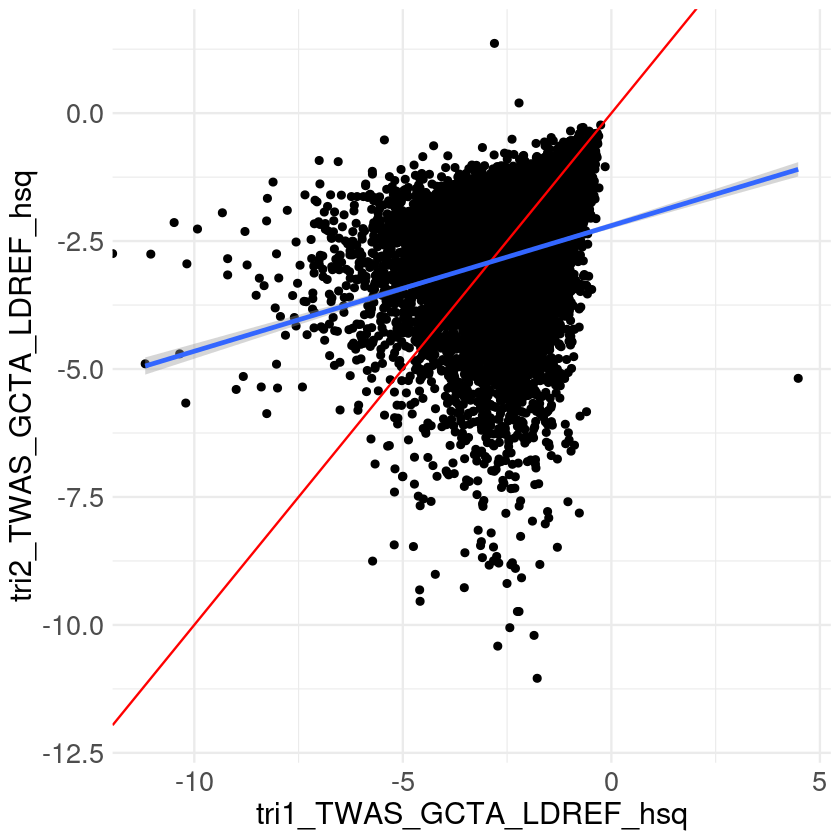

In [14]:
# bad plot...

ggplot(twas_full, aes(x = log(V2.x), y = log(V2.y))) +
    geom_point() +
    labs(x = "tri1_TWAS_GCTA_LDREF_hsq", y = "tri2_TWAS_GCTA_LDREF_hsq") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18)) +
    geom_abline(intercept = 0, slope = 1, color = "red") +
    geom_smooth(method = "lm")

In [3]:
# below is significant positive h2 genes only
twas_1 <- fread("/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_tri1_LDREF_rn/models_sum.txt", data.table = F)
twas_2 <- fread("/u/project/gandalm/cindywen/isoform_twas/TWAS/results/gene_tri2_LDREF_rn/models_sum.txt", data.table = F)

In [9]:
dim(twas_1)
dim(twas_2)

[1] 4224   11

[1] 2995   11

In [8]:
sum(twas_2$id %in% tri2_h2$gene)

[1] 2995

In [10]:
df_1 <- twas_1 %>% inner_join(tri1_h2, by = c("id" = "gene"))
df_2 <- twas_2 %>% inner_join(tri2_h2, by = c("id" = "gene"))

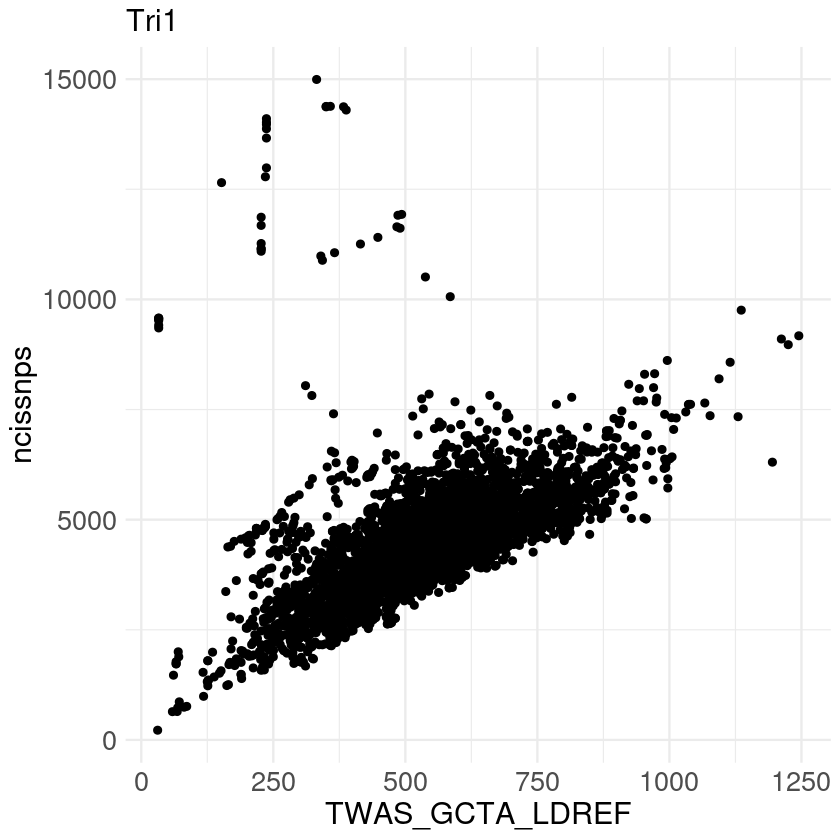

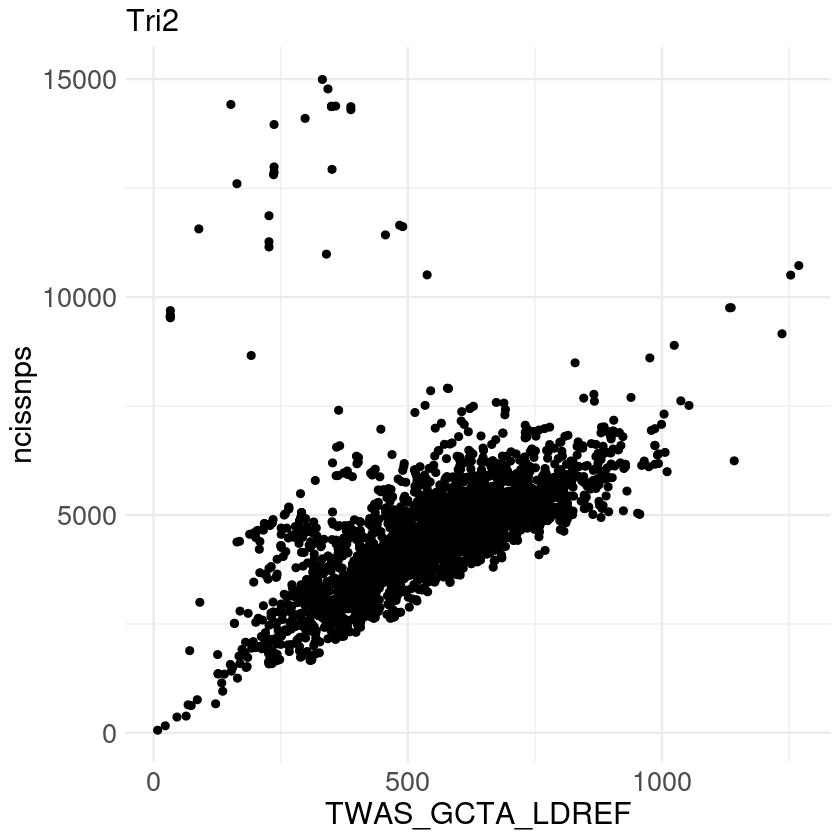

In [18]:
ggplot(df_1, aes(x = nsnps, y = ncissnps)) + 
    geom_point() +
    labs(x = "TWAS_GCTA_LDREF", title = "Tri1") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18)) 

ggplot(df_2, aes(x = nsnps, y = ncissnps)) + 
    geom_point() +
    labs(x = "TWAS_GCTA_LDREF", title = "Tri2") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18)) 

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



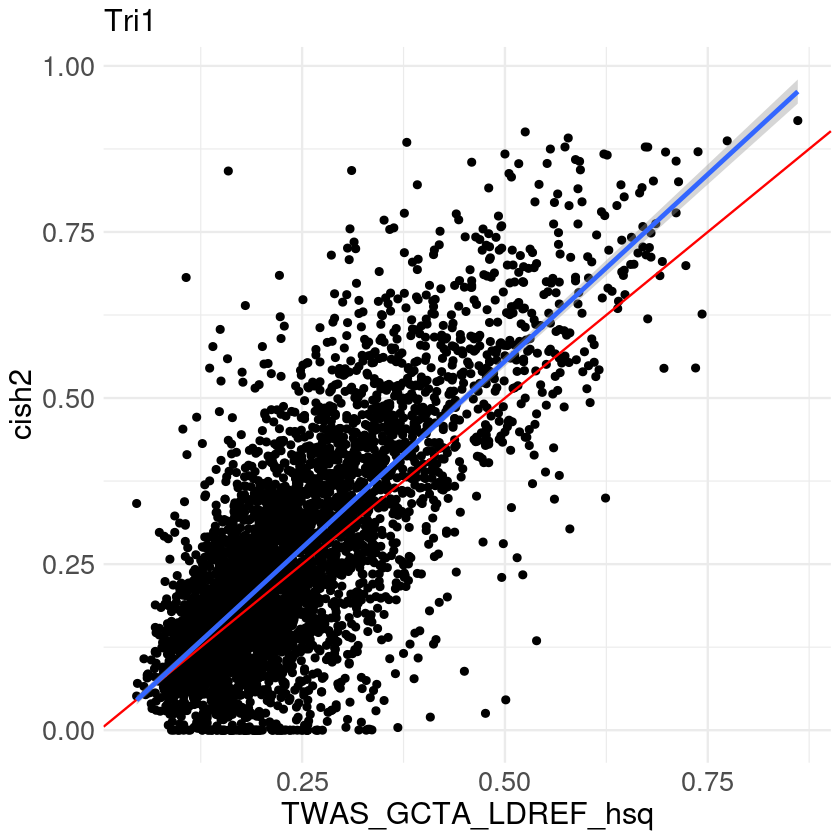

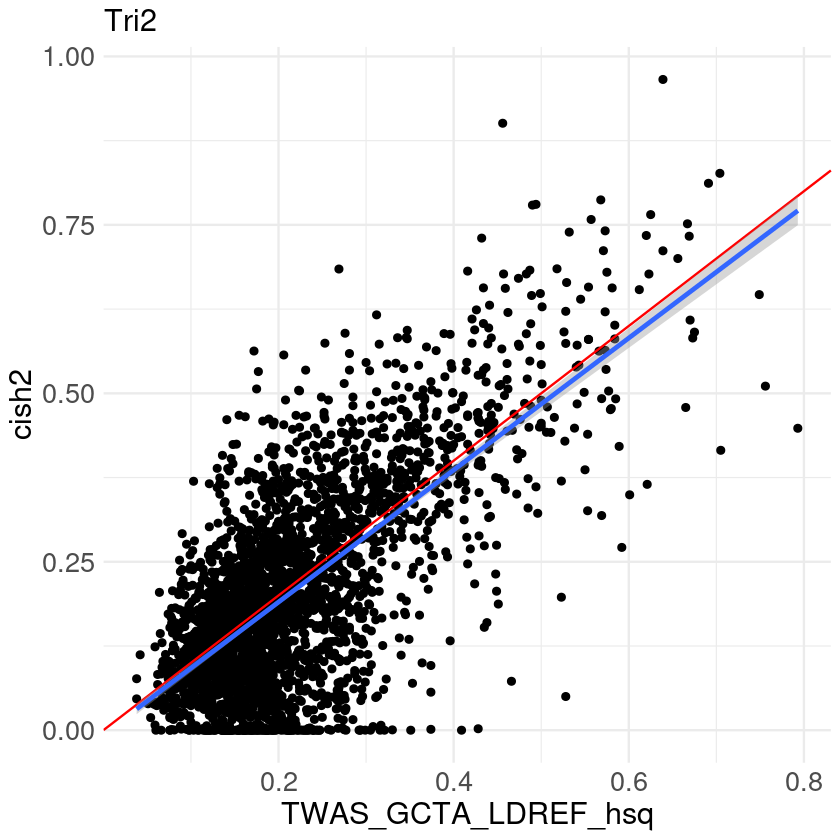

In [26]:
ggplot(df_1, aes(x = hsq, y = cish2)) + 
    geom_point() +
    labs(x = "TWAS_GCTA_LDREF_hsq", title = "Tri1") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18)) +
    geom_abline(intercept = 0, slope = 1, color = "red") +
        geom_smooth(method = "lm")

ggplot(df_2, aes(x = hsq, y = cish2)) + 
    geom_point() +
    labs(x = "TWAS_GCTA_LDREF_hsq", title = "Tri2") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18)) +
    geom_abline(intercept = 0, slope = 1, color = "red") +
    geom_smooth(method = "lm")

In [21]:
twas_shared <- twas_1 %>% inner_join(twas_2, by = "id")
dim(twas_shared)

[1] 1350   21

`geom_smooth()` using formula 'y ~ x'



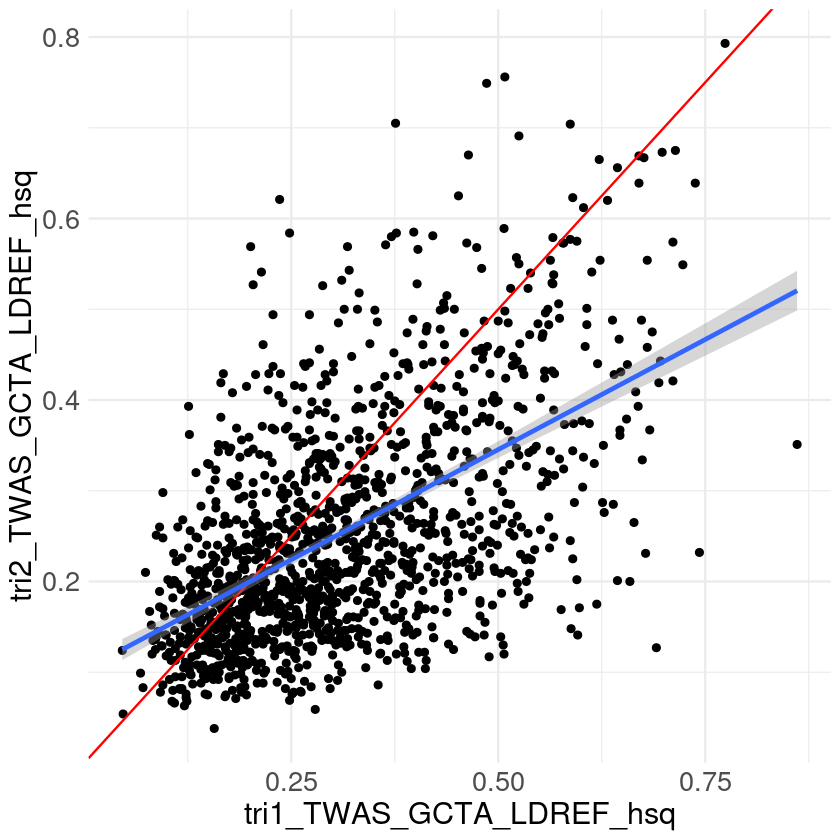

In [25]:
ggplot(twas_shared, aes(x = hsq.x, y = hsq.y)) +
    geom_point() +
    labs(x = "tri1_TWAS_GCTA_LDREF_hsq", y = "tri2_TWAS_GCTA_LDREF_hsq") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18)) +
    geom_abline(intercept = 0, slope = 1, color = "red") +
    geom_smooth(method = "lm")

**For main figure, compare with adult, limit to shared genes**

In [5]:
shared <- Reduce(intersect, list(tri1_h2$gene, tri2_h2$gene, adult$ID))

In [6]:
length(shared)

[1] 21221

In [7]:
tri1_h2 <- tri1_h2 %>% filter(gene %in% shared)
tri2_h2 <- tri2_h2 %>% filter(gene %in% shared)
adult <- adult %>% filter(ID %in% shared)

In [21]:
dim(tri1_h2)
dim(tri2_h2)
dim(adult)

[1] 21221    12

[1] 21221    12

[1] 21221    17

In [8]:
tri1_h2$Group <- "Tri1"
tri2_h2$Group <- "Tri2"
adult$Group <- "Adult"

In [17]:
# colnames(adult)
# colnames(tri1_h2)

In [9]:
adult <- adult %>% select(ID, V_Cis, V_Trans, V_Res, V_Phe, Cis_h2, Trans_h2, SNP_h2, SE_Cis_h2, SE_Trans_h2, SE_SNP_h2, Cis_SNPs, Group)
colnames(adult) <- colnames(tri1_h2)

In [12]:
h2 <- rbind(tri1_h2, tri2_h2, adult)

In [13]:
h2$Group <- factor(h2$Group, levels = c("Adult", "Tri2", "Tri1"))

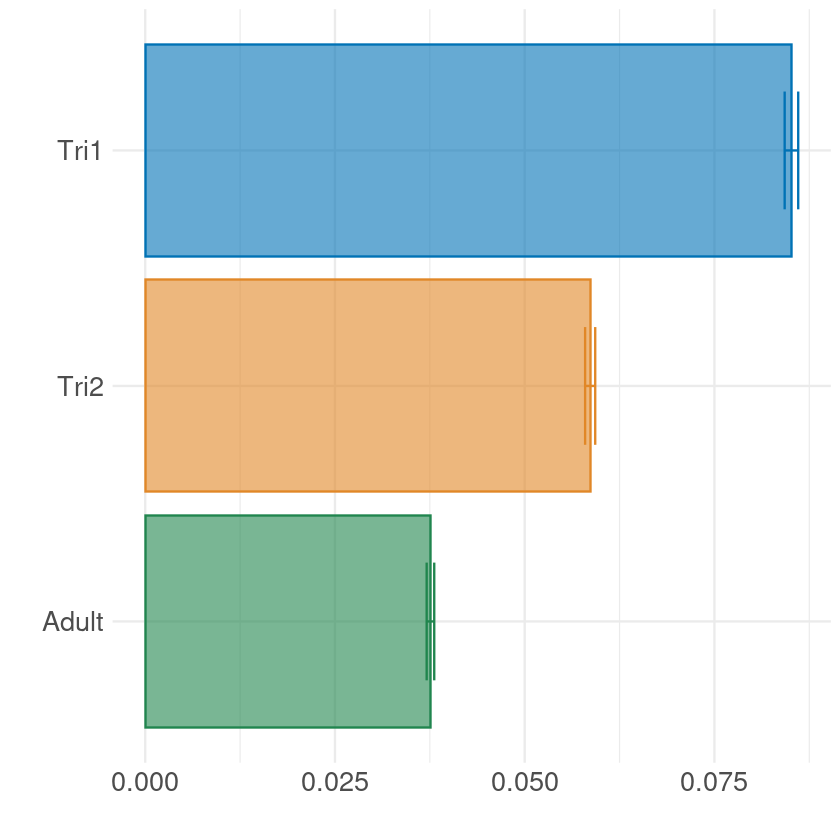

In [28]:
ggplot(h2, aes(x = cish2, y = Group, fill = Group, color = Group)) +
    stat_summary(fun.data = mean_se, position = position_dodge(0.95), geom = "errorbar", width = .5) + 
    stat_summary(fun = mean, position = position_dodge(width = 0.95), geom = "bar", alpha = 0.6)+
    labs(y = "", x = "") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") +
    scale_fill_manual(values = c("#20854EFF", "#E18727FF", "#0072B5FF")) +
    scale_color_manual(values = c("#20854EFF", "#E18727FF", "#0072B5FF")) 

In [29]:
ggsave("../figures/h2_bar.pdf", height = 5, width = 5)

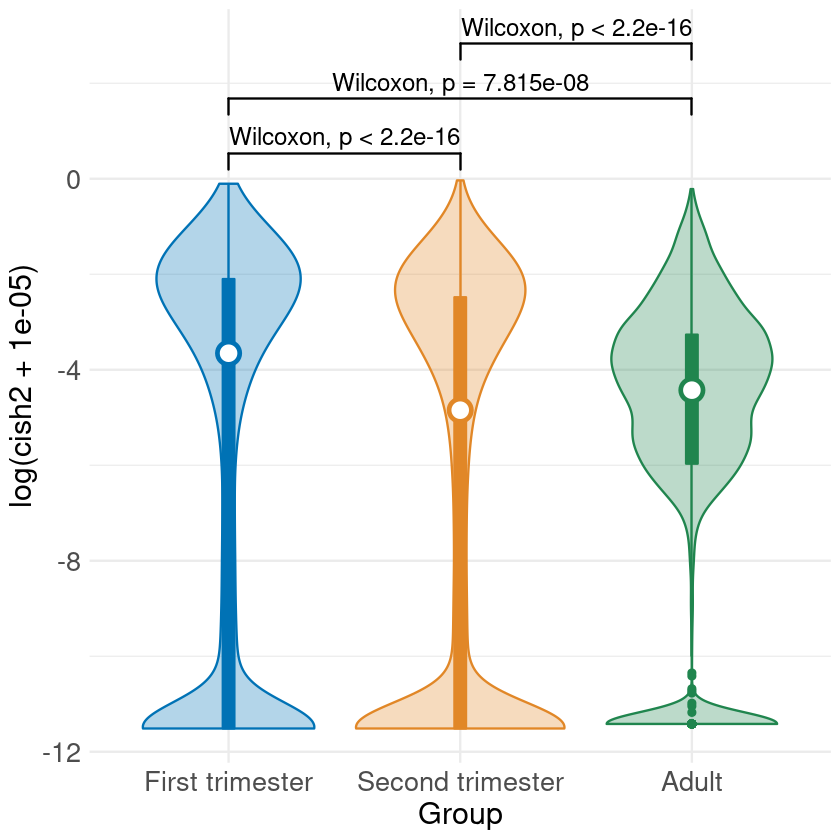

In [47]:
ggplot(h2, aes(x = Group, y = log(cish2 + 1e-5), fill = Group, color = Group)) +
    geom_violin(alpha = 0.3, trim = TRUE) +
    geom_boxplot(width = 0.05) +
#     labs(x = "Age", y = "Cis h2") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") +
    scale_fill_manual(values = c("#0072B5FF", "#E18727FF", "#20854EFF")) +
    scale_color_manual(values = c("#0072B5FF", "#E18727FF", "#20854EFF")) +
    stat_summary(fun = median, geom = "point", 
                 shape = 21, size = 5, show.legend = FALSE, fill = "white", stroke = 1.5) +
    geom_signif(
        comparisons = list(c("First trimester", "Second trimester"),
                           c("First trimester", "Adult"),
                           c("Adult", "Second trimester")),
        annotation = c("Wilcoxon, p < 2.2e-16", "Wilcoxon, p = 7.815e-08", "Wilcoxon, p < 2.2e-16"),
#         map_signif_level = TRUE,
        textsize = 5,
        step_increase = 0.1,
        color = "black"
  )

In [48]:
ggsave("../figures/h2_v2.pdf", width = 6, height = 6)

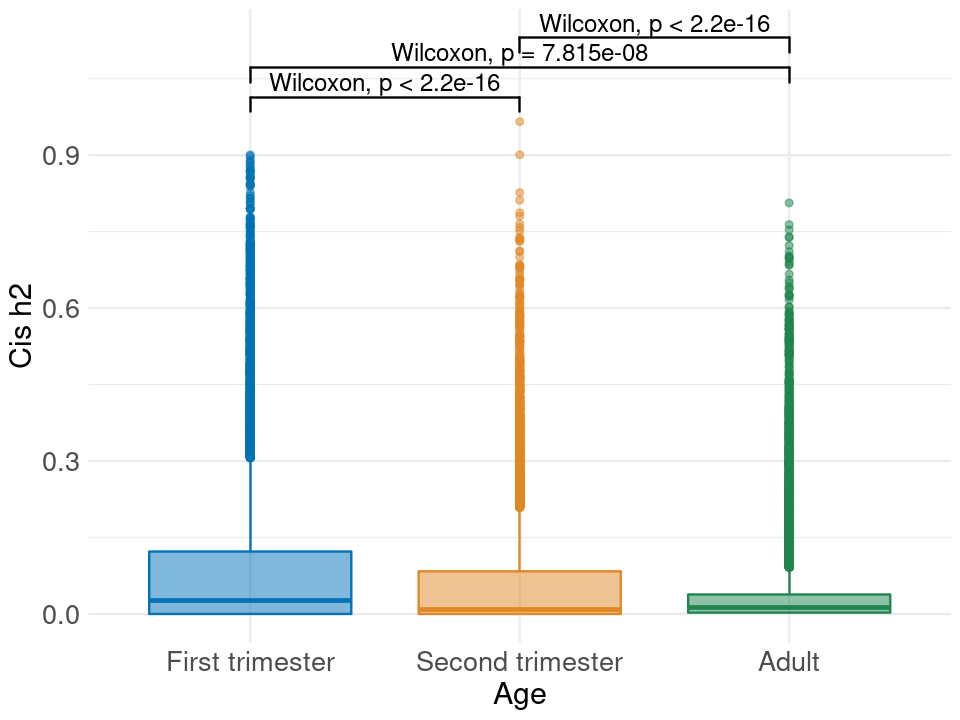

In [10]:
options(repr.plot.height = 6, repr.plot.width = 8)

ggplot(h2, aes(x = Group, y = cish2, fill = Group, color = Group)) +
#     geom_violin(alpha = 0.3, trim = TRUE, aes(color = Group)) +
    geom_boxplot(alpha = 0.5) +
    labs(x = "Age", y = "Cis h2") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") +
    scale_fill_manual(values = c("#0072B5FF", "#E18727FF", "#20854EFF")) +
    scale_color_manual(values = c("#0072B5FF", "#E18727FF", "#20854EFF")) +
#     stat_summary(fun = median, aes(color = Group), geom = "point", 
#                          shape = 21, size = 5, show.legend = FALSE, fill = "white", stroke = 1.5) +
#     ylim(0, 0.2)
    geom_signif(
        comparisons = list(c("First trimester", "Second trimester"),
                           c("First trimester", "Adult"),
                           c("Adult", "Second trimester")),
        annotation = c("Wilcoxon, p < 2.2e-16", "Wilcoxon, p = 7.815e-08", "Wilcoxon, p < 2.2e-16"),
#         map_signif_level = TRUE,
        textsize = 5,
        step_increase = 0.06,
        color = "black"
  )

In [43]:
ggsave("../figures/h2.pdf", width = 8, height = 6)

In [33]:
wilcox.test(tri1_h2$cish2, tri2_h2$cish2, alternative = "two.sided")
wilcox.test(adult$cish2, tri1_h2$cish2, alternative = "two.sided")
# wilcox.test(tri1_h2$cish2, adult$cish2)
wilcox.test(adult$cish2, tri2_h2$cish2, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  tri1_h2$cish2 and tri2_h2$cish2
W = 247847575, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  adult$cish2 and tri1_h2$cish2
W = 218387778, p-value = 7.815e-08
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  adult$cish2 and tri2_h2$cish2
W = 249145443, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


**4-19-2023 update: for revision, restrict to protein-coding**

In [15]:
h2.protein <- h2 %>% inner_join(gtf, by = c("gene" = "ensg")) 

In [17]:
h2.protein <- h2.protein %>% filter(V11 == "protein_coding")
dim(h2.protein)

[1] 44787    25

In [18]:
table(h2.protein$Group)


Adult  Tri2  Tri1 
14929 14929 14929 

In [23]:
h2.protein$Group <- factor(h2.protein$Group, levels = c("Tri1", "Tri2", "Adult"))

In [25]:
wilcox.test(h2.protein[h2.protein$Group == "Tri1", 'cish2'], 
            h2.protein[h2.protein$Group == "Tri2", 'cish2'], 
            alternative = "two.sided")
wilcox.test(h2.protein[h2.protein$Group == "Tri1", 'cish2'], 
            h2.protein[h2.protein$Group == "Adult", 'cish2'], 
            alternative = "two.sided")
wilcox.test(h2.protein[h2.protein$Group == "Tri2", 'cish2'], 
            h2.protein[h2.protein$Group == "Adult", 'cish2'], 
            alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  h2.protein[h2.protein$Group == "Tri1", "cish2"] and h2.protein[h2.protein$Group == "Tri2", "cish2"]
W = 121891934, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  h2.protein[h2.protein$Group == "Tri1", "cish2"] and h2.protein[h2.protein$Group == "Adult", "cish2"]
W = 113881514, p-value = 0.001029
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon rank sum test with continuity correction

data:  h2.protein[h2.protein$Group == "Tri2", "cish2"] and h2.protein[h2.protein$Group == "Adult", "cish2"]
W = 99574181, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


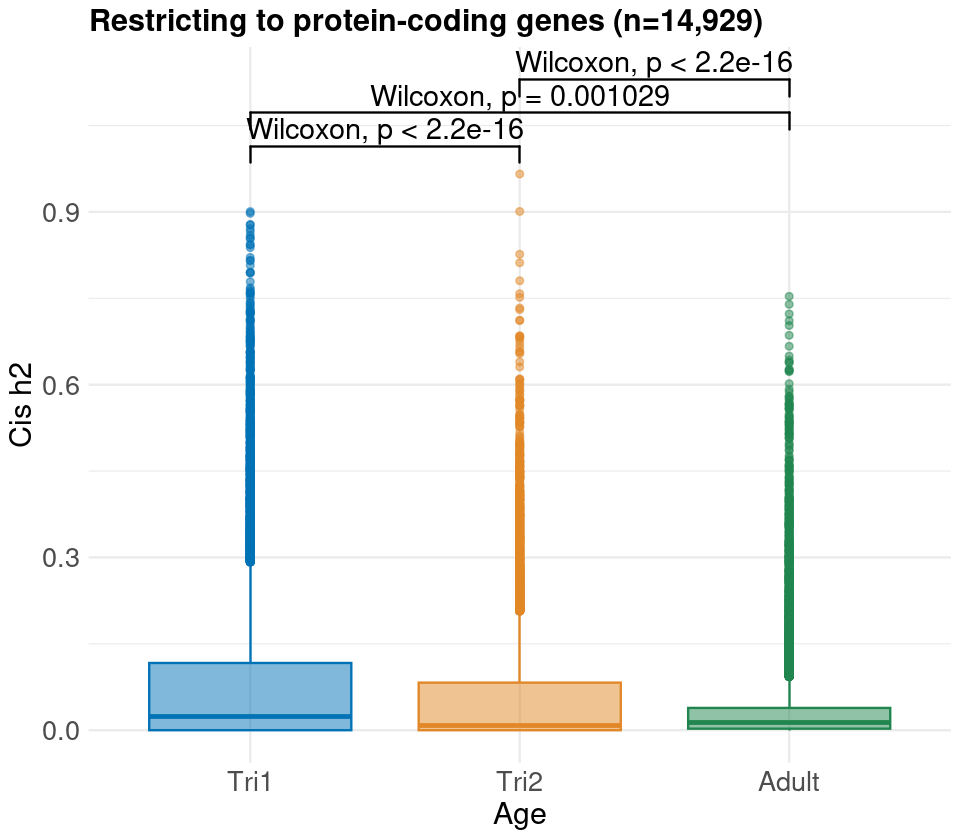

In [31]:
options(repr.plot.height = 7, repr.plot.width = 8)

ggplot(h2.protein, aes(x = Group, y = cish2, fill = Group, color = Group)) +
#     geom_violin(alpha = 0.3, trim = TRUE, aes(color = Group)) +
    geom_boxplot(alpha = 0.5) +
    labs(x = "Age", y = "Cis h2") + 
    ggtitle("Restricting to protein-coding genes (n=14,929)") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none",
          plot.title = element_text(size = 18, face = "bold")) +
    scale_fill_manual(values = c("#0072B5FF", "#E18727FF", "#20854EFF")) +
    scale_color_manual(values = c("#0072B5FF", "#E18727FF", "#20854EFF")) +

    geom_signif(
        comparisons = list(c("Tri1", "Tri2"),
                           c("Tri1", "Adult"),
                           c("Adult", "Tri2")),
        annotation = c("Wilcoxon, p < 2.2e-16", "Wilcoxon, p = 0.001029", "Wilcoxon, p < 2.2e-16"),
#         map_signif_level = TRUE,
        textsize = 6,
        step_increase = 0.06,
        color = "black"
  )

In [32]:
ggsave("../figures/h2_protein.pdf", width = 8, height = 7)

**Age batches, restricting to 31510 shared genes with converged results**

In [2]:
setwd("/u/project/gandalm/danieldu/gcta/data/sliding_fetal/hg19_gene_regressed/results/1Mbase_window/")

In [3]:
batch1 <- fread("1_to_150_1Mbase_window.csv", data.table = F)
batch2 <- fread("26_to_175_1Mbase_window.csv", data.table = F)
batch3 <- fread("51_to_200_1Mbase_window.csv", data.table = F)
batch4 <- fread("76_to_225_1Mbase_window.csv", data.table = F)
batch5 <- fread("101_to_250_1Mbase_window.csv", data.table = F)
batch6 <- fread("126_to_275_1Mbase_window.csv", data.table = F)
batch7 <- fread("151_to_280_1Mbase_window.csv", data.table = F)

In [24]:
lapply(list(batch1, batch2, batch3, batch4, batch5, batch6, batch7), dim)

[[1]]
[1] 31530    12

[[2]]
[1] 31528    12

[[3]]
[1] 31525    12

[[4]]
[1] 31525    12

[[5]]
[1] 31528    12

[[6]]
[1] 31527    12

[[7]]
[1] 31525    12

In [4]:
shared <- Reduce(intersect, list(batch1$gene, batch2$gene, batch3$gene,
                                 batch4$gene, batch5$gene, batch6$gene,
                                 batch7$gene))
length(shared)

[1] 31510

In [5]:
batch1 <- batch1 %>% filter(gene %in% shared)
batch2 <- batch2 %>% filter(gene %in% shared)
batch3 <- batch3 %>% filter(gene %in% shared)
batch4 <- batch4 %>% filter(gene %in% shared)
batch5 <- batch5 %>% filter(gene %in% shared)
batch6 <- batch6 %>% filter(gene %in% shared)
batch7 <- batch7 %>% filter(gene %in% shared)

In [27]:
lapply(list(batch1, batch2, batch3, batch4, batch5, batch6, batch7), dim)

[[1]]
[1] 31510    12

[[2]]
[1] 31510    12

[[3]]
[1] 31510    12

[[4]]
[1] 31510    12

[[5]]
[1] 31510    12

[[6]]
[1] 31510    12

[[7]]
[1] 31510    12

In [6]:
metadata <- read.table("/u/project/gandalm/cindywen/isoform_twas/eqtl_new/metadata_654.tsv", header = T)
metadata <- metadata %>% filter(ancestry == "eur") %>% arrange(Age)
# metadata <- metadata %>% mutate(PCW = Age*365/7 + 40)

In [7]:
eqtl_samples <- read.table("~/project-gandalm/isoform_twas/eqtl_new/data/90hcp_cov_629.txt", header = T, check.names = F)

In [8]:
dim(metadata)
metadata <- metadata %>% filter(Subject %in% colnames(eqtl_samples))
dim(metadata)

[1] 292   8

[1] 280   8

In [9]:
df <- data.frame("mean_age" = NA,
                 "se_age" = NA)

In [10]:
for(i in c(1:7)) {
    start_id <- (i-1)*25+1
    end_id <- start_id + 149
    if(i == 7) {
        end_id <- 280
    }
    df[i,'mean_age'] <- mean(metadata[start_id:end_id,'pcw'])
    df[i,'se_age'] <- sd(metadata[start_id:end_id,'pcw'])/sqrt(150)
}

In [11]:
df$cis_h2 <- df$se <- NA

In [12]:
df[1,"cis_h2"] <- median(batch1$cish2)
df[2,"cis_h2"] <- median(batch2$cish2)
df[3,"cis_h2"] <- median(batch3$cish2)
df[4,"cis_h2"] <- median(batch4$cish2)
df[5,"cis_h2"] <- median(batch5$cish2)
df[6,"cis_h2"] <- median(batch6$cish2)
df[7,"cis_h2"] <- median(batch7$cish2)

df[1,"se"] <- sd(batch1$cish2)/sqrt(31510)
df[2,"se"] <- sd(batch2$cish2)/sqrt(31510)
df[3,"se"] <- sd(batch3$cish2)/sqrt(31510)
df[4,"se"] <- sd(batch4$cish2)/sqrt(31510)
df[5,"se"] <- sd(batch5$cish2)/sqrt(31510)
df[6,"se"] <- sd(batch6$cish2)/sqrt(31510)
df[7,"se"] <- sd(batch7$cish2)/sqrt(31510)

In [13]:
df

mean_age se_age    se           cis_h2     
1 10.44047 0.1974379 0.0006523407 0.016942105
2 11.66120 0.1901191 0.0006097745 0.013635761
3 12.94300 0.1695632 0.0005747747 0.011605356
4 14.15687 0.1491077 0.0005433753 0.009923441
5 15.18093 0.1491849 0.0005221565 0.007000902
6 16.29173 0.1649319 0.0005102139 0.004616908
7 17.30692 0.2642946 0.0005380614 0.003849484

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



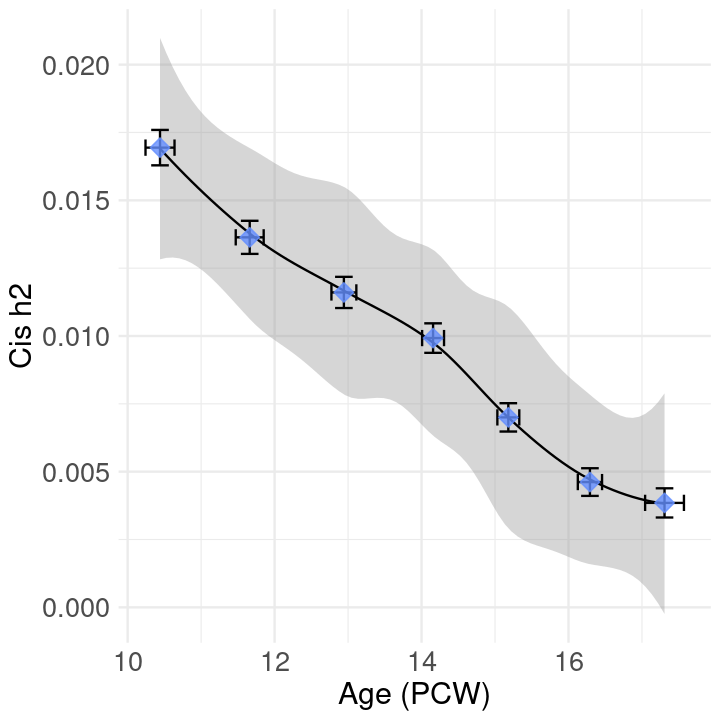

In [49]:
options(repr.plot.height = 6, repr.plot.width = 6)

ggplot(df, aes(x = mean_age, y = cis_h2)) +
    geom_smooth(color = "black", size = 0.5) +
    geom_errorbar(aes(xmin = mean_age - se_age, xmax = mean_age + se_age), width = 0.0006) +
    geom_errorbar(aes(ymin = cis_h2 - se, ymax = cis_h2 + se), width = 0.24) +
    geom_point(size = 4, color = "#648FFF", fill = "#648FFF", shape = 23, alpha = 0.8) +
    labs(x = "Age (PCW)", y = "Cis h2") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18))

In [50]:
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/h2_batch.pdf", width = 6, height = 6)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



**7/31/2023, revision, cell type marker genes**

In [14]:
expr <- fread("~/project-gandalm/isoform_twas/eqtl_new/data/eur/genes.280.bed.gz", data.table = F)

In [15]:
expr <- expr %>% select(1:4, metadata$Subject)
dim(expr)

[1] 31947   284

In [16]:
info <- fread("~/project-gandalm/isoform_twas/salmon/gencode.v33lift37.annotation.gene.info.tsv", data.table = F)

In [29]:
rg <- info %>% filter(V12 %in% c("VIM", "PTPRZ1", "SOX2", "SLC1A3", "HES1", "HOPX")) %>% select(ensg, V12)
opc <- info %>% filter(V12 %in% c("PTPRZ1", "OLIG1", "PDGFRA")) %>% select(ensg, V12)
cycling_pg <- info %>% filter(V12 %in% c("HMGB2", "SOX2", "MKI67", "PCNA")) %>% select(ensg, V12)
migrating_excitatory <- info %>% filter(V12 %in% c("NEUROD6", "POU3F2")) %>% select(ensg, V12)
maturing_excitatory <- info %>% filter(V12 %in% c("STMN2", "NEUROD6", "SATB2")) %>% select(ensg, V12)
intermediate_pg <- info %>% filter(V12 %in% c("PPP1R17", "SSTR2", "EOMES", "PENK")) %>% select(ensg, V12)
# TODO NES, MTOR

In [12]:
# markers <- info %>% filter(V12 %in% c("VIM", "PTPRZ1", "SOX2", "SLC1A3", "HES1", "HOPX", #RG
#                                       "PTPRZ1", "OLIG1", "PDGFRA", #OPCs
#                                       "HMGB2", "SOX2", "MK167", "PCNA", #cycling progenitors
#                                       "PPP1R17", "SSTR2", "EOMES", "PENK", #intermediate progenitors
#                                       "NEUROD6", "POU3F2", #newborn migrating excitatory neurons
#                                       "STMN2", "NEUROD6", "SATB2", # maturing excitatory
#                                       "NES",
#                                       "MTOR"
#                                      )) %>%
#         select(ensg, V12)

In [13]:
# for (i in 1:nrow(markers)) {
#     if (markers[i,'V12'] %in% c("VIM", "PTPRZ1", "SOX2", "SLC1A3", "HES1", "HOPX")) {
#         markers[i,'type'] <- "RG"
#     }
#     if (markers[i,'V12'] %in% c("PPP1R17", "SSTR2", "EOMES", "PENK")) {
#         markers[i,'type'] <- "IP"
#     }
#     if (markers[i,'V12'] %in% c("NEUROD6", "POU3F2")) {
#         markers[i,'type'] <- "MN"
#     }
# }

In [48]:
test <- info %>% filter(V12 %in% c("NES", "MTOR")) %>% select(ensg, V12)

In [49]:
test

ensg            V12 
1 ENSG00000198793 MTOR
2 ENSG00000132688 NES

In [51]:
for (j in 1:nrow(test)) {
    gene <- test[j,'V12']
    geneid <- test[j,'ensg']
    for (i in 1:7) {
        start_id <- (i-1)*25+1
        end_id <- start_id + 149
        if(i == 7) {
            end_id <- 280
        }
    df[i, gene] <- as.numeric(rowMeans(expr[expr$ID == geneid, (start_id+4):(end_id+4)]))
    df[i, paste0(gene, '_se')] <- sd(expr[expr$ID == geneid, (start_id+4):(end_id+4)])/sqrt(150)
    }
}

# plot_list <- list()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


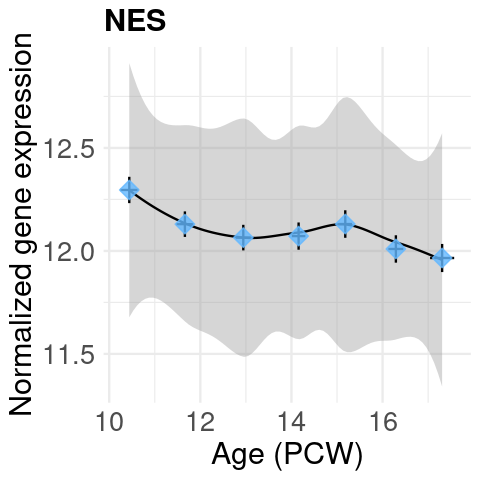

In [61]:
gene <- "NES"
options(repr.plot.height = 4, repr.plot.width = 4)

ggplot(df, aes_string(x = "mean_age", y = gene)) +
    geom_smooth(color = "black", size = 0.5) +
    geom_errorbar(aes(xmin = mean_age - se_age, xmax = mean_age + se_age), width = 0) +
    geom_errorbar(
    aes_string(ymin = paste0(gene, " - ", paste0(gene, "_se")), 
               ymax = paste0(gene, " + ", paste0(gene, "_se"))),
        width = 0
  ) +
    geom_point(size = 4, color = "steelblue1", fill = "steelblue1", shape = 23, alpha = 0.8) +
    labs(x = "Age (PCW)", y = "Normalized gene expression") + 
    ggtitle(gene) +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"))

In [62]:
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/markergene_NES.pdf", width = 4, height = 4)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


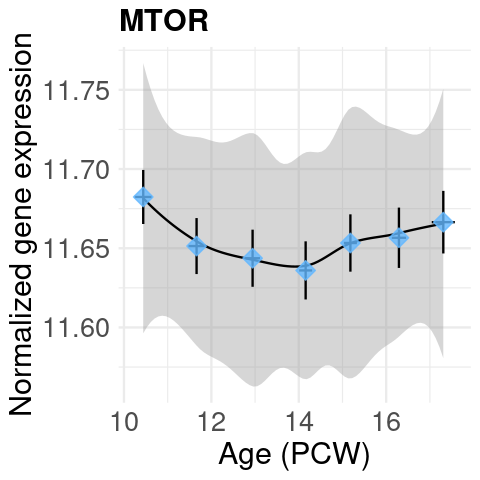

In [63]:
gene <- "MTOR"
options(repr.plot.height = 4, repr.plot.width = 4)

ggplot(df, aes_string(x = "mean_age", y = gene)) +
    geom_smooth(color = "black", size = 0.5) +
    geom_errorbar(aes(xmin = mean_age - se_age, xmax = mean_age + se_age), width = 0) +
    geom_errorbar(
    aes_string(ymin = paste0(gene, " - ", paste0(gene, "_se")), 
               ymax = paste0(gene, " + ", paste0(gene, "_se"))),
    width = 0
  ) +
    geom_point(size = 4, color = "steelblue1", fill = "steelblue1", shape = 23, alpha = 0.8) +
    labs(x = "Age (PCW)", y = "Normalized gene expression") + 
    ggtitle(gene) +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"))
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/markergene_MTOR.pdf", width = 4, height = 4)

In [64]:
# normalized expression, no covariates
for (j in 1:nrow(rg)) {
    gene <- rg[j,'V12']
    geneid <- rg[j,'ensg']
    for (i in 1:7) {
        start_id <- (i-1)*25+1
        end_id <- start_id + 149
        if(i == 7) {
            end_id <- 280
        }
    df[i, gene] <- as.numeric(rowMeans(expr[expr$ID == geneid, (start_id+4):(end_id+4)]))
    df[i, paste0(gene, '_se')] <- sd(expr[expr$ID == geneid, (start_id+4):(end_id+4)])/sqrt(150)
    }
}

In [41]:
plot_list <- list()

for (gene in c("VIM", "PTPRZ1", "SOX2", "SLC1A3", "HES1", "HOPX")) {
plot <- ggplot(df, aes_string(x = "mean_age", y = gene)) +
    geom_smooth(color = "black", size = 0.5) +
    geom_errorbar(aes(xmin = mean_age - se_age, xmax = mean_age + se_age), width = 0.05) +
    geom_errorbar(
    aes_string(ymin = paste0(gene, " - ", paste0(gene, "_se")), 
               ymax = paste0(gene, " + ", paste0(gene, "_se"))),
    width = 0.24
  ) +
    geom_point(size = 4, color = "red", fill = "red", shape = 23, alpha = 0.8) +
    labs(x = "Age (PCW)", y = "Normalized gene expression") + 
    ggtitle(gene) +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"))
    plot_list[[gene]] <- plot
}

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


png 
  2

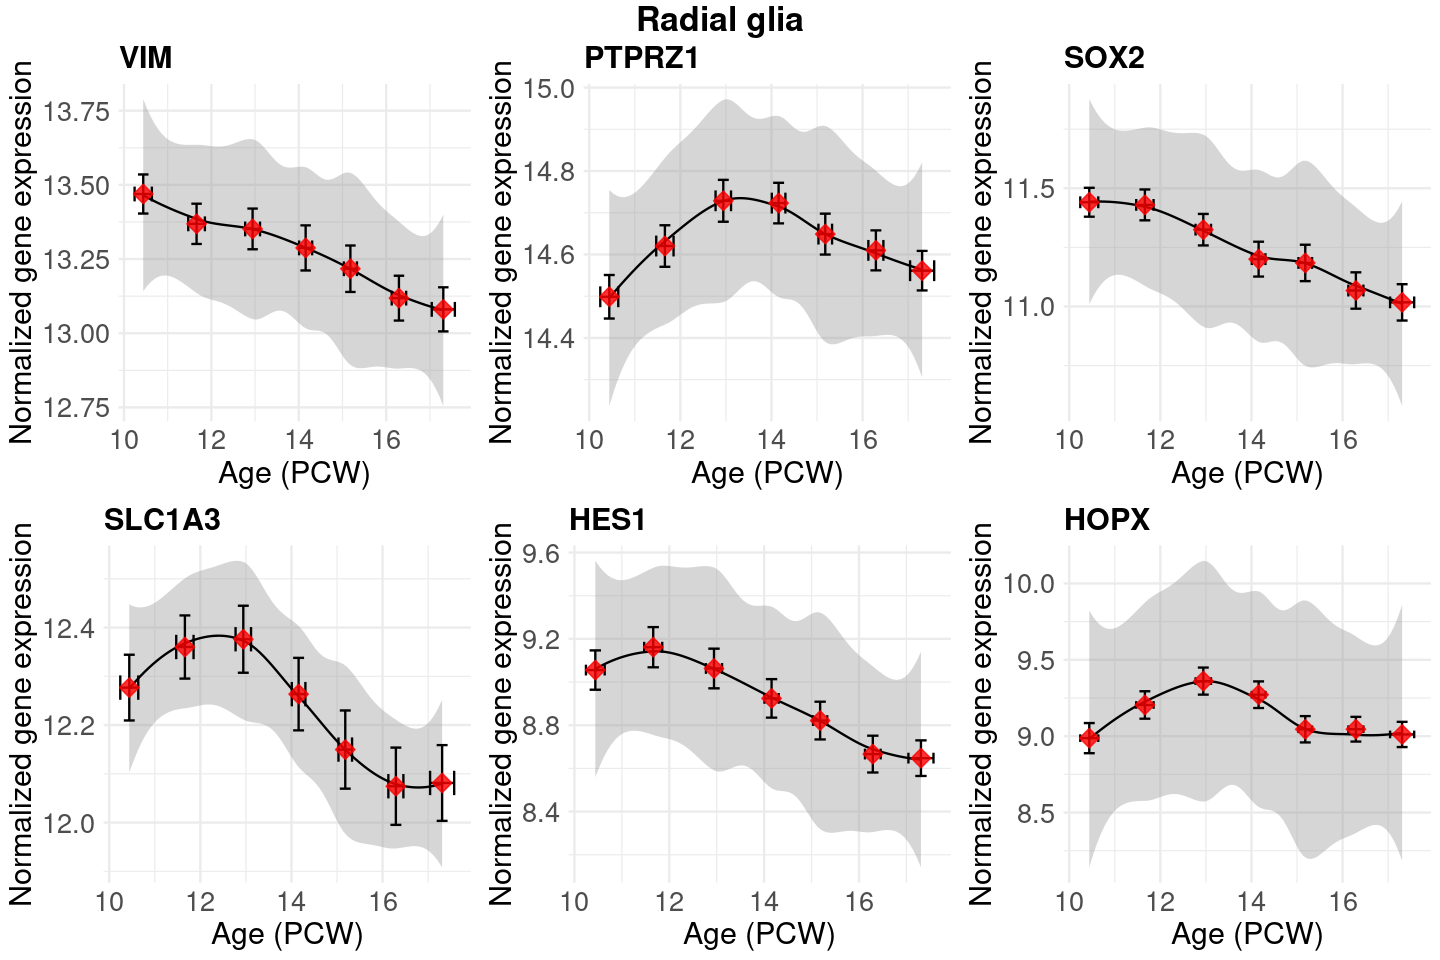

In [42]:
options(repr.plot.height = 8, repr.plot.width = 12)
title_grob <- textGrob("Radial glia", gp = gpar(fontsize = 20, fontface = "bold"))
grid.arrange(grobs = plot_list, top = title_grob, ncol = 3)

pdf("~/project-gandalm/isoform_twas/eqtl_new/figures/markergene_RG.pdf", width = 12, height = 8)
grid.arrange(grobs = plot_list, top = title_grob, ncol = 3)
dev.off()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


png 
  2

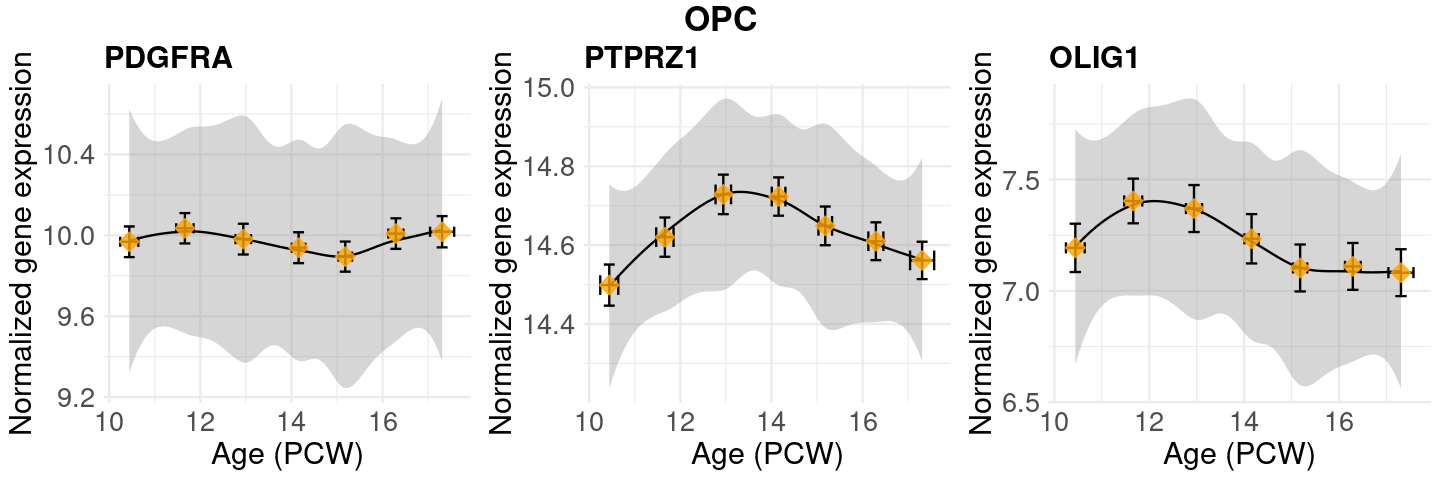

In [43]:
for (j in 1:nrow(opc)) {
    gene <- opc[j,'V12']
    geneid <- opc[j,'ensg']
    for (i in 1:7) {
        start_id <- (i-1)*25+1
        end_id <- start_id + 149
        if(i == 7) {
            end_id <- 280
        }
    df[i, gene] <- as.numeric(rowMeans(expr[expr$ID == geneid, (start_id+4):(end_id+4)]))
    df[i, paste0(gene, '_se')] <- sd(expr[expr$ID == geneid, (start_id+4):(end_id+4)])/sqrt(150)
    }
}

plot_list <- list()

for (gene in opc$V12) {
plot <- ggplot(df, aes_string(x = "mean_age", y = gene)) +
    geom_smooth(color = "black", size = 0.5) +
    geom_errorbar(aes(xmin = mean_age - se_age, xmax = mean_age + se_age), width = 0.05) +
    geom_errorbar(
    aes_string(ymin = paste0(gene, " - ", paste0(gene, "_se")), 
               ymax = paste0(gene, " + ", paste0(gene, "_se"))),
    width = 0.24
  ) +
    geom_point(size = 4, color = "orange", fill = "orange", shape = 23, alpha = 0.8) +
    labs(x = "Age (PCW)", y = "Normalized gene expression") + 
    ggtitle(gene) +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"))
    plot_list[[gene]] <- plot
}

options(repr.plot.height = 4, repr.plot.width = 12)
title_grob <- textGrob("OPC", gp = gpar(fontsize = 20, fontface = "bold"))
grid.arrange(grobs = plot_list, top = title_grob, ncol = 3)

pdf("~/project-gandalm/isoform_twas/eqtl_new/figures/markergene_OPC.pdf", width = 12, height = 4)
grid.arrange(grobs = plot_list, top = title_grob, ncol = 3)
dev.off()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


png 
  2

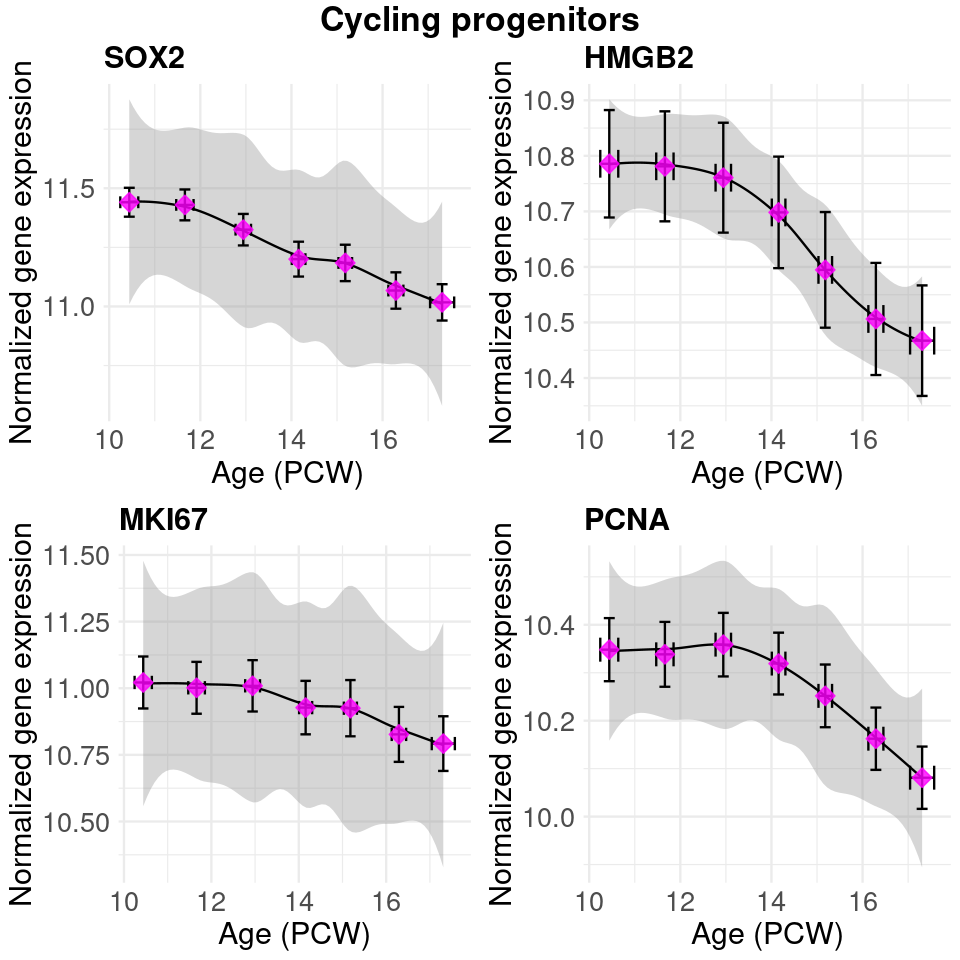

In [44]:
for (j in 1:nrow(cycling_pg)) {
    gene <- cycling_pg[j,'V12']
    geneid <- cycling_pg[j,'ensg']
    for (i in 1:7) {
        start_id <- (i-1)*25+1
        end_id <- start_id + 149
        if(i == 7) {
            end_id <- 280
        }
    df[i, gene] <- as.numeric(rowMeans(expr[expr$ID == geneid, (start_id+4):(end_id+4)]))
    df[i, paste0(gene, '_se')] <- sd(expr[expr$ID == geneid, (start_id+4):(end_id+4)])/sqrt(150)
    }
}

plot_list <- list()

for (gene in cycling_pg$V12) {
plot <- ggplot(df, aes_string(x = "mean_age", y = gene)) +
    geom_smooth(color = "black", size = 0.5) +
    geom_errorbar(aes(xmin = mean_age - se_age, xmax = mean_age + se_age), width = 0.05) +
    geom_errorbar(
    aes_string(ymin = paste0(gene, " - ", paste0(gene, "_se")), 
               ymax = paste0(gene, " + ", paste0(gene, "_se"))),
    width = 0.24
  ) +
    geom_point(size = 4, color = "magenta", fill = "magenta", shape = 23, alpha = 0.8) +
    labs(x = "Age (PCW)", y = "Normalized gene expression") + 
    ggtitle(gene) +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"))
    plot_list[[gene]] <- plot
}

options(repr.plot.height = 8, repr.plot.width = 8)
title_grob <- textGrob("Cycling progenitors", gp = gpar(fontsize = 20, fontface = "bold"))
grid.arrange(grobs = plot_list, top = title_grob, ncol = 2)

pdf("~/project-gandalm/isoform_twas/eqtl_new/figures/markergene_cycling_pg.pdf", width = 8, height = 8)
grid.arrange(grobs = plot_list, top = title_grob, ncol = 2)
dev.off()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


png 
  2

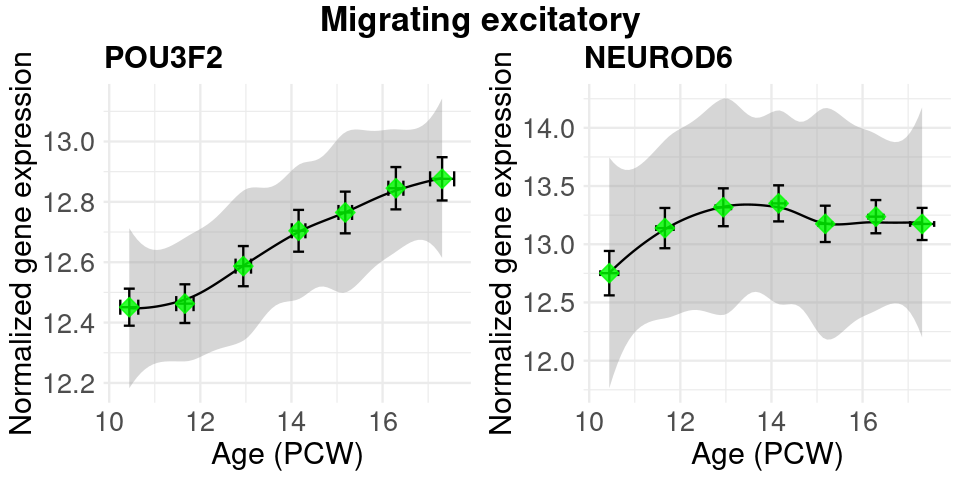

In [45]:
for (j in 1:nrow(migrating_excitatory)) {
    gene <- migrating_excitatory[j,'V12']
    geneid <- migrating_excitatory[j,'ensg']
    for (i in 1:7) {
        start_id <- (i-1)*25+1
        end_id <- start_id + 149
        if(i == 7) {
            end_id <- 280
        }
    df[i, gene] <- as.numeric(rowMeans(expr[expr$ID == geneid, (start_id+4):(end_id+4)]))
    df[i, paste0(gene, '_se')] <- sd(expr[expr$ID == geneid, (start_id+4):(end_id+4)])/sqrt(150)
    }
}

plot_list <- list()

for (gene in migrating_excitatory$V12) {
plot <- ggplot(df, aes_string(x = "mean_age", y = gene)) +
    geom_smooth(color = "black", size = 0.5) +
    geom_errorbar(aes(xmin = mean_age - se_age, xmax = mean_age + se_age), width = 0.05) +
    geom_errorbar(
    aes_string(ymin = paste0(gene, " - ", paste0(gene, "_se")), 
               ymax = paste0(gene, " + ", paste0(gene, "_se"))),
    width = 0.24
  ) +
    geom_point(size = 4, color = "green", fill = "green", shape = 23, alpha = 0.8) +
    labs(x = "Age (PCW)", y = "Normalized gene expression") + 
    ggtitle(gene) +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"))
    plot_list[[gene]] <- plot
}

options(repr.plot.height = 4, repr.plot.width = 8)
title_grob <- textGrob("Migrating excitatory", gp = gpar(fontsize = 20, fontface = "bold"))
grid.arrange(grobs = plot_list, top = title_grob, ncol = 2)

pdf("~/project-gandalm/isoform_twas/eqtl_new/figures/markergene_migrating_excitatory.pdf", width = 8, height = 4)
grid.arrange(grobs = plot_list, top = title_grob, ncol = 2)
dev.off()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


png 
  2

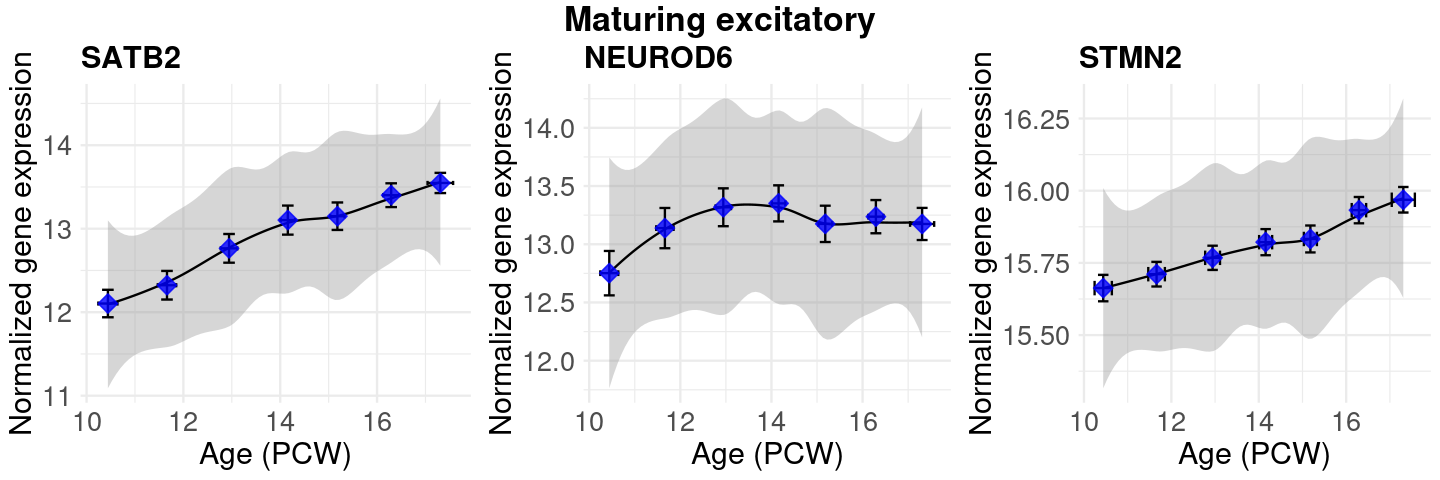

In [46]:
for (j in 1:nrow(maturing_excitatory)) {
    gene <- maturing_excitatory[j,'V12']
    geneid <- maturing_excitatory[j,'ensg']
    for (i in 1:7) {
        start_id <- (i-1)*25+1
        end_id <- start_id + 149
        if(i == 7) {
            end_id <- 280
        }
    df[i, gene] <- as.numeric(rowMeans(expr[expr$ID == geneid, (start_id+4):(end_id+4)]))
    df[i, paste0(gene, '_se')] <- sd(expr[expr$ID == geneid, (start_id+4):(end_id+4)])/sqrt(150)
    }
}

plot_list <- list()

for (gene in maturing_excitatory$V12) {
plot <- ggplot(df, aes_string(x = "mean_age", y = gene)) +
    geom_smooth(color = "black", size = 0.5) +
    geom_errorbar(aes(xmin = mean_age - se_age, xmax = mean_age + se_age), width = 0.05) +
    geom_errorbar(
    aes_string(ymin = paste0(gene, " - ", paste0(gene, "_se")), 
               ymax = paste0(gene, " + ", paste0(gene, "_se"))),
    width = 0.24
  ) +
    geom_point(size = 4, color = "blue", fill = "blue", shape = 23, alpha = 0.8) +
    labs(x = "Age (PCW)", y = "Normalized gene expression") + 
    ggtitle(gene) +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"))
    plot_list[[gene]] <- plot
}

options(repr.plot.height = 4, repr.plot.width = 12)
title_grob <- textGrob("Maturing excitatory", gp = gpar(fontsize = 20, fontface = "bold"))
grid.arrange(grobs = plot_list, top = title_grob, ncol = 3)

pdf("~/project-gandalm/isoform_twas/eqtl_new/figures/markergene_maturing_excitatory.pdf", width = 12, height = 4)
grid.arrange(grobs = plot_list, top = title_grob, ncol = 3)
dev.off()

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


png 
  2

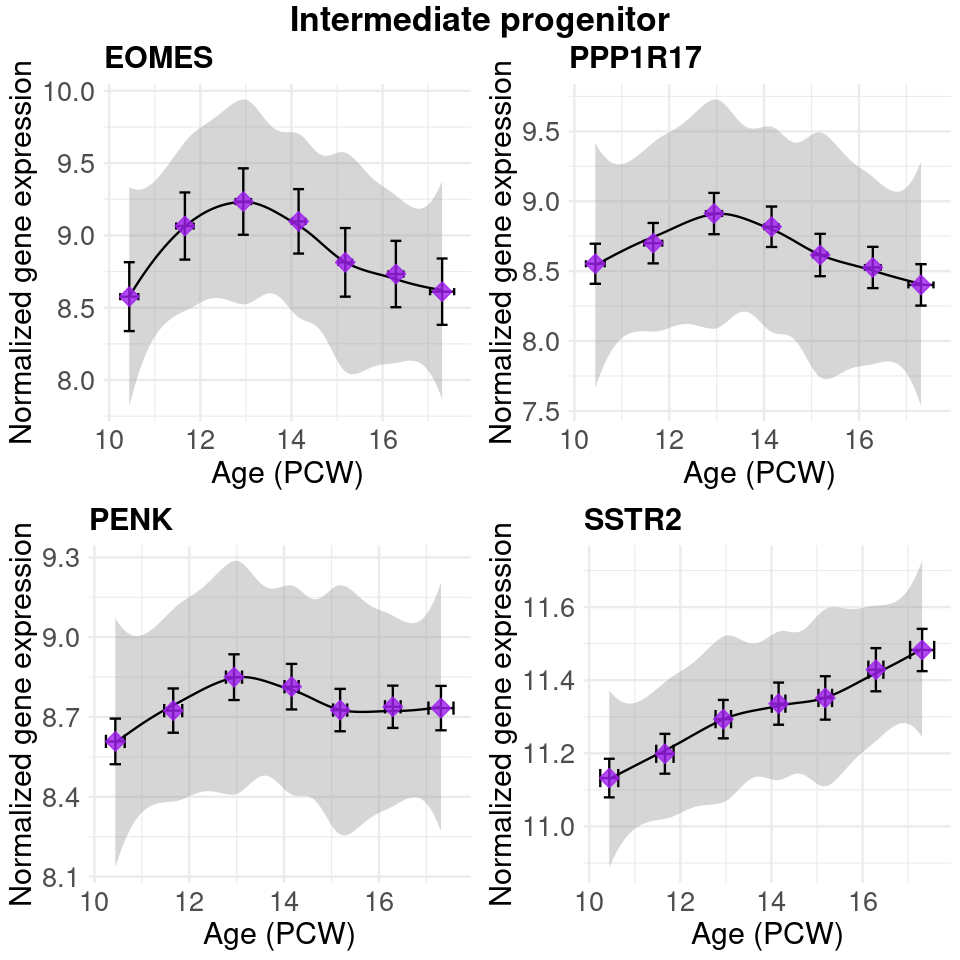

In [47]:
for (j in 1:nrow(intermediate_pg)) {
    gene <- intermediate_pg[j,'V12']
    geneid <- intermediate_pg[j,'ensg']
    for (i in 1:7) {
        start_id <- (i-1)*25+1
        end_id <- start_id + 149
        if(i == 7) {
            end_id <- 280
        }
    df[i, gene] <- as.numeric(rowMeans(expr[expr$ID == geneid, (start_id+4):(end_id+4)]))
    df[i, paste0(gene, '_se')] <- sd(expr[expr$ID == geneid, (start_id+4):(end_id+4)])/sqrt(150)
    }
}

plot_list <- list()

for (gene in intermediate_pg$V12) {
plot <- ggplot(df, aes_string(x = "mean_age", y = gene)) +
    geom_smooth(color = "black", size = 0.5) +
    geom_errorbar(aes(xmin = mean_age - se_age, xmax = mean_age + se_age), width = 0.05) +
    geom_errorbar(
    aes_string(ymin = paste0(gene, " - ", paste0(gene, "_se")), 
               ymax = paste0(gene, " + ", paste0(gene, "_se"))),
    width = 0.24
  ) +
    geom_point(size = 4, color = "purple", fill = "purple", shape = 23, alpha = 0.8) +
    labs(x = "Age (PCW)", y = "Normalized gene expression") + 
    ggtitle(gene) +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"))
    plot_list[[gene]] <- plot
}

options(repr.plot.height = 8, repr.plot.width = 8)
title_grob <- textGrob("Intermediate progenitor", gp = gpar(fontsize = 20, fontface = "bold"))
grid.arrange(grobs = plot_list, top = title_grob, ncol = 2)

pdf("~/project-gandalm/isoform_twas/eqtl_new/figures/markergene_IP.pdf", width = 8, height = 8)
grid.arrange(grobs = plot_list, top = title_grob, ncol = 2)
dev.off()

In [17]:
# Table S8 from Li et al 2018
markers <- read.table("~/project-gandalm/isoform_twas/eqtl_new/li2018_markergenes.tsv")

In [71]:
head(markers)
dim(markers)

V1     V2          
1 FABP3  ExN_prenatal
2 LRRC7  ExN_prenatal
3 CLVS1  ExN_prenatal
4 SATB2  ExN_prenatal
5 UNC5D  ExN_prenatal
6 ADRA2A ExN_prenatal

[1] 52  2

In [18]:
colnames(markers) <- c("gene", "type")
markers <- markers %>% inner_join(info, by = c("gene" = "V12")) %>% select(gene, type, ensg)
head(markers)
dim(markers)

gene   type         ensg           
1 FABP3  ExN_prenatal ENSG00000121769
2 LRRC7  ExN_prenatal ENSG00000033122
3 CLVS1  ExN_prenatal ENSG00000177182
4 SATB2  ExN_prenatal ENSG00000119042
5 UNC5D  ExN_prenatal ENSG00000156687
6 ADRA2A ExN_prenatal ENSG00000150594

[1] 46  3

In [77]:
# df <- df %>% select(1:2)

In [19]:
df$NPC_mean <- df$ExN_mean <- NA
npc_genes <- markers[markers$type == "NPC_prenatal",'ensg']
exn_genes <- markers[markers$type == "ExN_prenatal",'ensg']

In [20]:
for (i in 1:7) {
        start_id <- (i-1)*25+1
        end_id <- start_id + 149
        if(i == 7) {
            end_id <- 280
        }
    df[i, 'NPC_mean'] <- mean(as.matrix(expr[expr$ID %in% npc_genes, (start_id+4):(end_id+4)]))
    df[i, 'ExN_mean'] <- mean(as.matrix(expr[expr$ID %in% exn_genes, (start_id+4):(end_id+4)]))

}

In [21]:
df

mean_age se_age    se           cis_h2      ExN_mean NPC_mean
1 10.44047 0.1974379 0.0006523407 0.016942105 11.02105 11.18524
2 11.66120 0.1901191 0.0006097745 0.013635761 11.15734 11.16061
3 12.94300 0.1695632 0.0005747747 0.011605356 11.32481 11.11136
4 14.15687 0.1491077 0.0005433753 0.009923441 11.42841 11.09605
5 15.18093 0.1491849 0.0005221565 0.007000902 11.43993 11.05529
6 16.29173 0.1649319 0.0005102139 0.004616908 11.57656 10.99733
7 17.30692 0.2642946 0.0005380614 0.003849484 11.64716 10.97449

In [22]:
cor(df$cis_h2, df$ExN_mean, method = 'pearson')
cor(df$cis_h2, df$NPC_mean, method = 'pearson')

[1] -0.9805386

[1] 0.986961

In [94]:
df1 <- rbind(df, df)
df1

mean_age se_age    ExN_mean NPC_mean
1  10.44047 0.1974379 11.02105 11.18524
2  11.66120 0.1901191 11.15734 11.16061
3  12.94300 0.1695632 11.32481 11.11136
4  14.15687 0.1491077 11.42841 11.09605
5  15.18093 0.1491849 11.43993 11.05529
6  16.29173 0.1649319 11.57656 10.99733
7  17.30692 0.2642946 11.64716 10.97449
8  10.44047 0.1974379 11.02105 11.18524
9  11.66120 0.1901191 11.15734 11.16061
10 12.94300 0.1695632 11.32481 11.11136
11 14.15687 0.1491077 11.42841 11.09605
12 15.18093 0.1491849 11.43993 11.05529
13 16.29173 0.1649319 11.57656 10.99733
14 17.30692 0.2642946 11.64716 10.97449

In [95]:
df1$type <- c(rep("ExN_prenatal", 7), rep("NPC_prenatal", 7))
df1[8:14,'ExN_mean'] <- df1[8:14,'NPC_mean']
df1 <- df1 %>% select(-NPC_mean)
colnames(df1) <- c("mean_age", "se_age", "mean_expr", "type")

In [96]:
df1

mean_age se_age    mean_expr type        
1  10.44047 0.1974379 11.02105  ExN_prenatal
2  11.66120 0.1901191 11.15734  ExN_prenatal
3  12.94300 0.1695632 11.32481  ExN_prenatal
4  14.15687 0.1491077 11.42841  ExN_prenatal
5  15.18093 0.1491849 11.43993  ExN_prenatal
6  16.29173 0.1649319 11.57656  ExN_prenatal
7  17.30692 0.2642946 11.64716  ExN_prenatal
8  10.44047 0.1974379 11.18524  NPC_prenatal
9  11.66120 0.1901191 11.16061  NPC_prenatal
10 12.94300 0.1695632 11.11136  NPC_prenatal
11 14.15687 0.1491077 11.09605  NPC_prenatal
12 15.18093 0.1491849 11.05529  NPC_prenatal
13 16.29173 0.1649319 10.99733  NPC_prenatal
14 17.30692 0.2642946 10.97449  NPC_prenatal

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


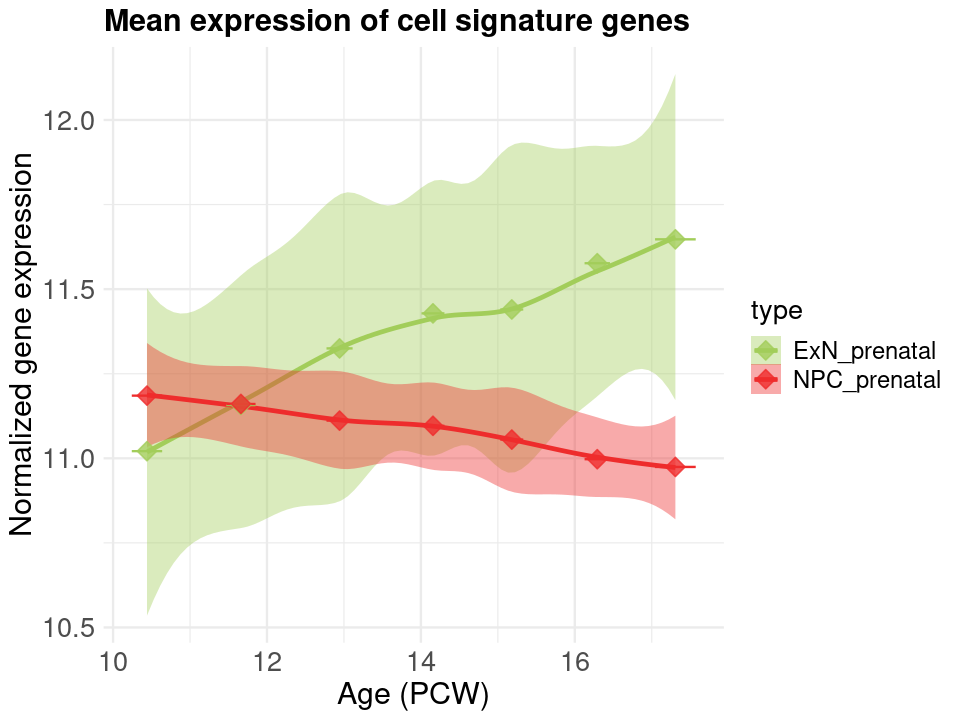

In [109]:
options(repr.plot.height = 6, repr.plot.width = 8)

ggplot(df1, aes(x = mean_age, y = mean_expr, color = type, fill = type)) +
    geom_smooth() +
    geom_errorbar(aes(xmin = mean_age - se_age, xmax = mean_age + se_age), width = 0) +
    geom_point(size = 4, shape = 23, alpha = 0.8) +
    labs(x = "Age (PCW)", y = "Normalized gene expression") +
    ggtitle("Mean expression of cell signature genes") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_color_manual(values = c("NPC_prenatal" = "firebrick2", "ExN_prenatal" = "darkolivegreen3")) +
    scale_fill_manual(values = c("NPC_prenatal" = "firebrick2", "ExN_prenatal" = "darkolivegreen3"))


In [110]:
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/NPC_ExN.pdf", width = 8, height = 6)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


**4-19-2023: revision, protein-coding genes**

In [20]:
# df_list <- list(batch1, batch2, batch3, batch4, batch5, batch6, batch7)

# join_df <- function(df, df_join, condition_col) {
#   df %>% 
#     inner_join(df_join, by = c("gene" = "ensg")) %>%
#     mutate(condition_col = ifelse(condition_col == "protein_coding", TRUE, FALSE)) %>%
#     filter(condition_col == TRUE)
# }

# df_protein <- lapply(df_list, join_df, df_join = gtf, condition_col = "V11")

In [23]:
batch1_protein <- batch1 %>% inner_join(gtf, by = c("gene" = "ensg")) %>% filter(V11 == "protein_coding")
dim(batch1_protein)

[1] 16187    24

In [24]:
batch2_protein <- batch2 %>% inner_join(gtf, by = c("gene" = "ensg")) %>% filter(V11 == "protein_coding")
batch3_protein <- batch3 %>% inner_join(gtf, by = c("gene" = "ensg")) %>% filter(V11 == "protein_coding")
batch4_protein <- batch4 %>% inner_join(gtf, by = c("gene" = "ensg")) %>% filter(V11 == "protein_coding")
batch5_protein <- batch5 %>% inner_join(gtf, by = c("gene" = "ensg")) %>% filter(V11 == "protein_coding")
batch6_protein <- batch6 %>% inner_join(gtf, by = c("gene" = "ensg")) %>% filter(V11 == "protein_coding")
batch7_protein <- batch7 %>% inner_join(gtf, by = c("gene" = "ensg")) %>% filter(V11 == "protein_coding")

In [26]:
lapply(list(batch1_protein, batch2_protein, batch3_protein, batch4_protein, batch5_protein, batch6_protein, batch7_protein), dim)

[[1]]
[1] 16187    24

[[2]]
[1] 16187    24

[[3]]
[1] 16187    24

[[4]]
[1] 16187    24

[[5]]
[1] 16187    24

[[6]]
[1] 16187    24

[[7]]
[1] 16187    24

In [27]:
df$cis_h2_protein <- df$se_protein <- NA

df[1,"cis_h2_protein"] <- median(batch1_protein$cish2)
df[2,"cis_h2_protein"] <- median(batch2_protein$cish2)
df[3,"cis_h2_protein"] <- median(batch3_protein$cish2)
df[4,"cis_h2_protein"] <- median(batch4_protein$cish2)
df[5,"cis_h2_protein"] <- median(batch5_protein$cish2)
df[6,"cis_h2_protein"] <- median(batch6_protein$cish2)
df[7,"cis_h2_protein"] <- median(batch7_protein$cish2)

df[1,"se_protein"] <- sd(batch1_protein$cish2)/sqrt(16187)
df[2,"se_protein"] <- sd(batch2_protein$cish2)/sqrt(16187)
df[3,"se_protein"] <- sd(batch3_protein$cish2)/sqrt(16187)
df[4,"se_protein"] <- sd(batch4_protein$cish2)/sqrt(16187)
df[5,"se_protein"] <- sd(batch5_protein$cish2)/sqrt(16187)
df[6,"se_protein"] <- sd(batch6_protein$cish2)/sqrt(16187)
df[7,"se_protein"] <- sd(batch7_protein$cish2)/sqrt(16187)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


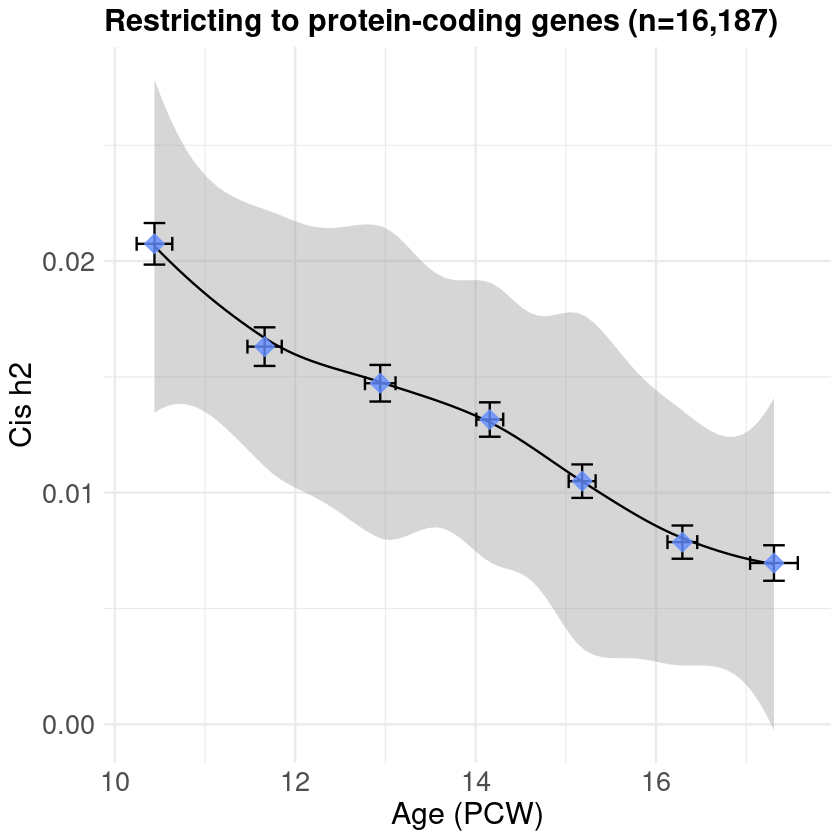

In [32]:
options(repr.plot.height = 7, repr.plot.width = 7)

ggplot(df, aes(x = mean_age, y = cis_h2_protein)) +
    geom_smooth(color = "black", size = 0.5) +
    geom_errorbar(aes(xmin = mean_age - se_age, xmax = mean_age + se_age), width = 0.0006) +
    geom_errorbar(aes(ymin = cis_h2_protein - se_protein, ymax = cis_h2_protein + se_protein), width = 0.24) +
    geom_point(size = 4, color = "#648FFF", fill = "#648FFF", shape = 23, alpha = 0.8) +
    labs(x = "Age (PCW)", y = "Cis h2") + 
    ggtitle("Restricting to protein-coding genes (n=16,187)") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"))

In [42]:
df2 <- rbind(df, df)
df2$Group <- c(rep("All genes\nn=31,510", 7), rep("Protein-coding only\nn = 16,187",7))

In [43]:
df2$cis_h2_v2 <- c(df2$cis_h2[1:7], df2$cis_h2_protein[8:14])
df2$se_v2 <- c(df2$se[1:7], df2$se_protein[8:14])
df2 <- df2 %>% select(mean_age, se_age, cis_h2_v2, se_v2, Group)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


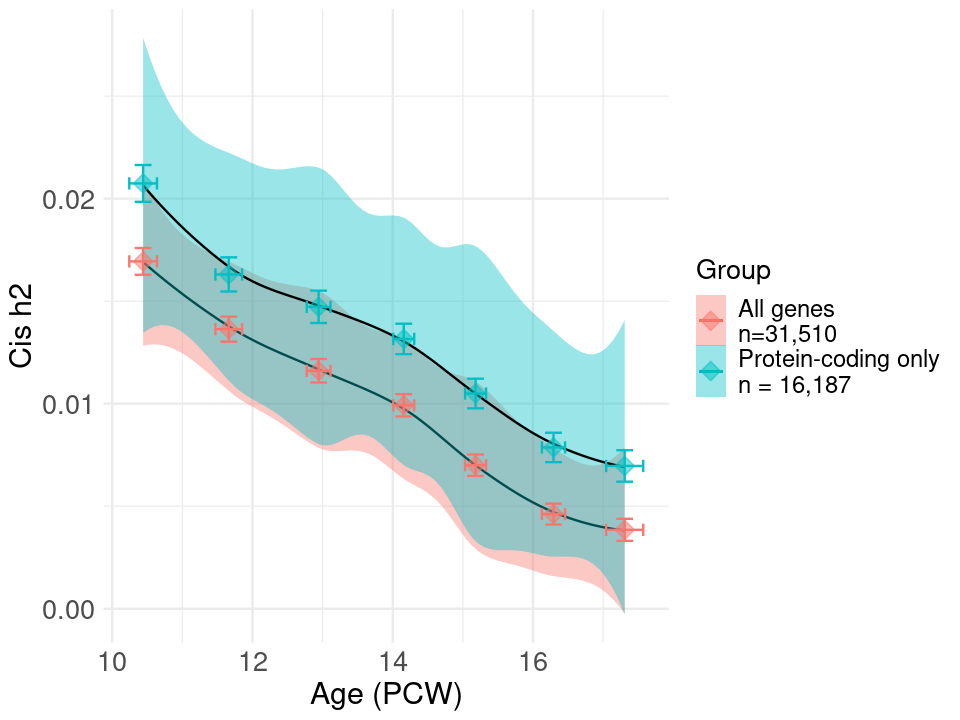

In [44]:
options(repr.plot.height = 6, repr.plot.width = 8)

ggplot(df2, aes(x = mean_age, y = cis_h2_v2, color = Group, fill = Group)) +
    geom_smooth(color = "black", size = 0.5) +
    geom_errorbar(aes(xmin = mean_age - se_age, xmax = mean_age + se_age), width = 0.0006) +
    geom_errorbar(aes(ymin = cis_h2_v2 - se_v2, ymax = cis_h2_v2 + se_v2), width = 0.24) +
    geom_point(size = 4, shape = 23, alpha = 0.5) +
    labs(x = "Age (PCW)", y = "Cis h2") + 
#     ggtitle("Restricting to protein-coding genes (n=16,187)") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
         legend.title = element_text(size = 16),
         legend.text = element_text(size = 14))

In [45]:
ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/h2_batch_protein.pdf", width = 8, height = 6)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


**Splicing**

In [49]:
tri1_h2 <- fread("/u/project/gandalm/danieldu/shared_results/fetal/h2/splicing/splicing_1Mbase_cis_trans_tri1.csv", data.table = F)
tri2_h2 <- fread("/u/project/gandalm/danieldu/shared_results/fetal/h2/splicing/splicing_1Mbase_cis_trans_tri2.csv", data.table = F)

In [50]:
shared <- Reduce(intersect, list(tri1_h2$junction, tri2_h2$junction))
length(shared)

[1] 267400

In [51]:
tri1_h2 <- tri1_h2 %>% filter(junction %in% shared)
tri2_h2 <- tri2_h2 %>% filter(junction %in% shared)
tri1_h2$Group <- "First trimester"
tri2_h2$Group <- "Second trimester"

In [52]:
h2 <- rbind(tri1_h2, tri2_h2)

In [53]:
h2$Group <- factor(h2$Group, levels = c("First trimester", "Second trimester"))

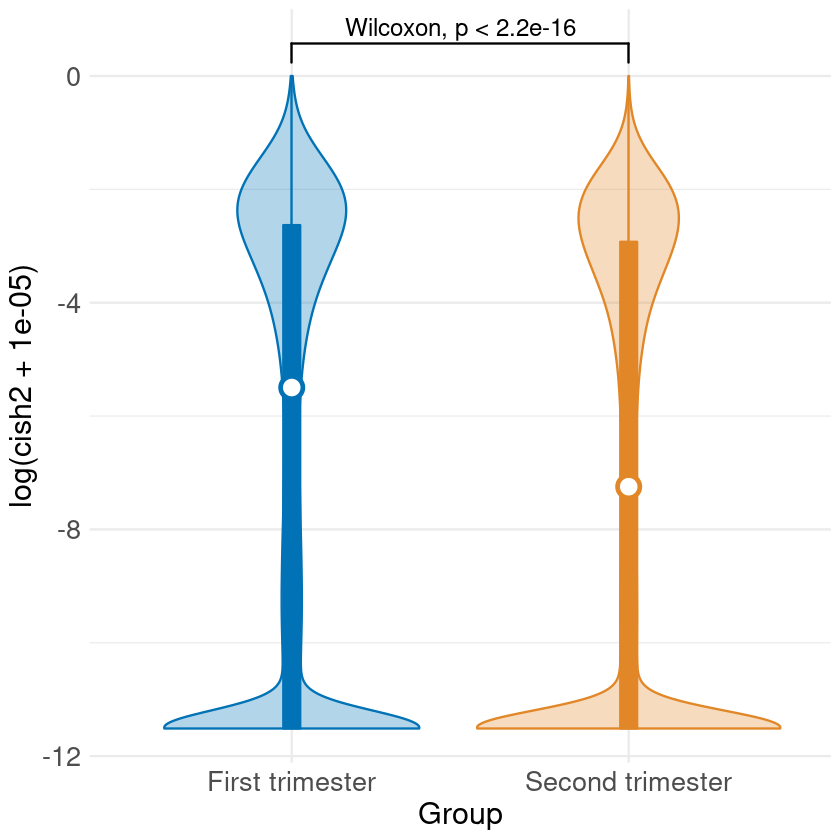

In [54]:
ggplot(h2, aes(x = Group, y = log(cish2 + 1e-5), fill = Group, color = Group)) +
    geom_violin(alpha = 0.3, trim = TRUE) +
    geom_boxplot(width = 0.05) +
#     labs(x = "Age", y = "Cis h2") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") +
    scale_fill_manual(values = c("#0072B5FF", "#E18727FF")) +
    scale_color_manual(values = c("#0072B5FF", "#E18727FF")) +
    stat_summary(fun = median, geom = "point", 
                 shape = 21, size = 5, show.legend = FALSE, fill = "white", stroke = 1.5) +
    geom_signif(
        comparisons = list(c("First trimester", "Second trimester")),
        annotation = c("Wilcoxon, p < 2.2e-16"),
#         map_signif_level = TRUE,
        textsize = 5,
        step_increase = 0.1,
        color = "black"
  )

In [55]:
ggsave("../../sqtl_new/figures/h2_v2.pdf", width = 6, height = 6)

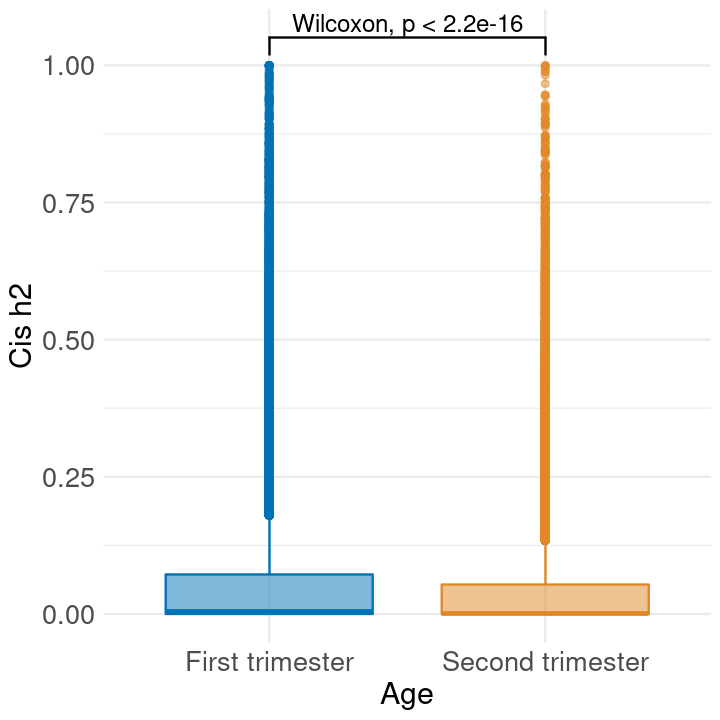

In [40]:
ggplot(h2, aes(x = Group, y = cish2, fill = Group, color = Group)) +
#     geom_violin(alpha = 0.3, trim = TRUE, aes(color = Group)) +
    geom_boxplot(alpha = 0.5) +
    labs(x = "Age", y = "Cis h2") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") +
    scale_fill_manual(values = c("#0072B5FF", "#E18727FF")) +
    scale_color_manual(values = c("#0072B5FF", "#E18727FF")) +
#     stat_summary(fun = median, aes(color = Group), geom = "point", 
#                          shape = 21, size = 5, show.legend = FALSE, fill = "white", stroke = 1.5) +
#     ylim(0, 2) +
    geom_signif(
        comparisons = list(c("First trimester", "Second trimester")),
        annotation = c("Wilcoxon, p < 2.2e-16"),
#         map_signif_level = TRUE,
        textsize = 5,
        step_increase = 0.06,
        color = "black"
  )

In [41]:
ggsave("../../sqtl_new/figures/h2.pdf", width = 6, height = 6)

In [29]:
wilcox.test(tri1_h2$cish2, tri2_h2$cish2, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  tri1_h2$cish2 and tri2_h2$cish2
W = 3.8214e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [31]:
wilcox.test(tri1_h2$cish2, tri2_h2$cish2)


	Wilcoxon rank sum test with continuity correction

data:  tri1_h2$cish2 and tri2_h2$cish2
W = 3.8214e+10, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [2]:
setwd("/u/project/gandalm/danieldu/shared_results/fetal/h2/splicing")

In [4]:
batch1 <- fread("1_to_150_1Mbase_cis_trans.csv", data.table = F)
batch2 <- fread("26_to_175_1Mbase_cis_trans.csv", data.table = F)
batch3 <- fread("51_to_200_1Mbase_cis_trans.csv", data.table = F)
batch4 <- fread("76_to_225_1Mbase_cis_trans.csv", data.table = F)
batch5 <- fread("101_to_250_1Mbase_cis_trans.csv", data.table = F)
batch6 <- fread("126_to_275_1Mbase_cis_trans.csv", data.table = F)
batch7 <- fread("151_to_288_1Mbase_cis_trans.csv", data.table = F)

In [7]:
shared <- Reduce(intersect, list(batch1$junction, batch2$junction, batch3$junction,
                                 batch4$junction, batch5$junction, batch6$junction,
                                 batch7$junction))
length(shared)

[1] 270008

In [8]:
batch1 <- batch1 %>% filter(junction %in% shared)
batch2 <- batch2 %>% filter(junction %in% shared)
batch3 <- batch3 %>% filter(junction %in% shared)
batch4 <- batch4 %>% filter(junction %in% shared)
batch5 <- batch5 %>% filter(junction %in% shared)
batch6 <- batch6 %>% filter(junction %in% shared)
batch7 <- batch7 %>% filter(junction %in% shared)

In [9]:
metadata <- read.table("/u/project/gandalm/cindywen/isoform_twas/eqtl_new/metadata_inferSex_trimester_ancestry_640.tsv", header = T)
metadata <- metadata %>% filter(ancestry == "eur") %>% arrange(Age)
metadata <- metadata %>% mutate(PCW = Age*365/7 + 40)

In [10]:
df <- data.frame("mean_age" = NA,
                 "se_age" = NA)

In [11]:
for(i in c(1:7)) {
    start_id <- (i-1)*25+1
    end_id <- start_id + 149
    if(i == 7) {
        end_id <- 288
    }
    df[i,'mean_age'] <- mean(metadata[start_id:end_id,'PCW'])
    df[i,'se_age'] <- sd(metadata[start_id:end_id,'PCW'])/sqrt(150)
}

In [12]:
df$cis_h2 <- df$se <- NA

df[1,"cis_h2"] <- median(batch1$cish2)
df[2,"cis_h2"] <- median(batch2$cish2)
df[3,"cis_h2"] <- median(batch3$cish2)
df[4,"cis_h2"] <- median(batch4$cish2)
df[5,"cis_h2"] <- median(batch5$cish2)
df[6,"cis_h2"] <- median(batch6$cish2)
df[7,"cis_h2"] <- median(batch7$cish2)

df[1,"se"] <- sd(batch1$cish2)/sqrt(270008)
df[2,"se"] <- sd(batch2$cish2)/sqrt(270008)
df[3,"se"] <- sd(batch3$cish2)/sqrt(270008)
df[4,"se"] <- sd(batch4$cish2)/sqrt(270008)
df[5,"se"] <- sd(batch5$cish2)/sqrt(270008)
df[6,"se"] <- sd(batch6$cish2)/sqrt(270008)
df[7,"se"] <- sd(batch7$cish2)/sqrt(270008)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



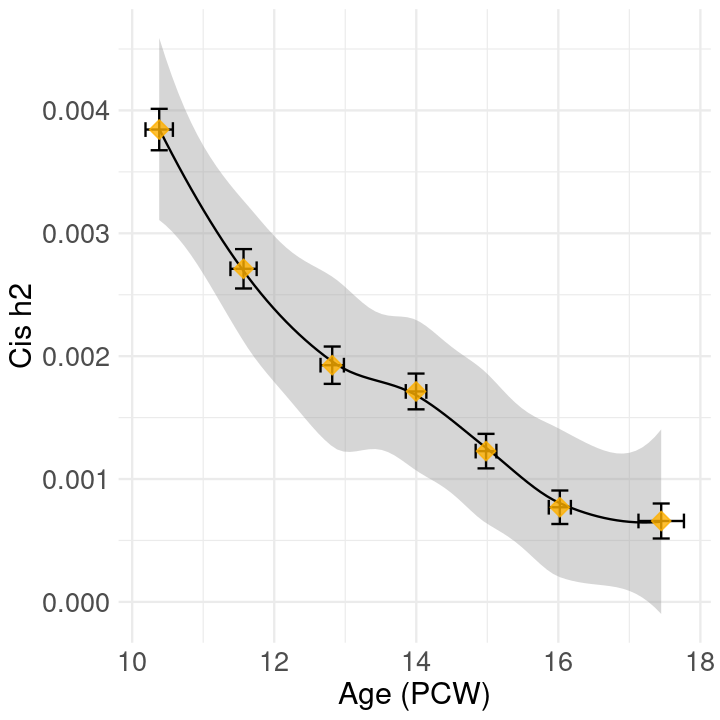

In [15]:
options(repr.plot.height = 6, repr.plot.width = 6)

ggplot(df, aes(x = mean_age, y = cis_h2)) +
    geom_smooth(color = "black", size = 0.5) +
    geom_errorbar(aes(xmin = mean_age - se_age, xmax = mean_age + se_age), width = 0.00012) +
    geom_errorbar(aes(ymin = cis_h2 - se, ymax = cis_h2 + se), width = 0.24) +
    geom_point(size = 4, color = "#FFB000", fill = "#FFB000", shape = 23, alpha = 0.8) +
    labs(x = "Age (PCW)", y = "Cis h2") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18))

ggsave("~/project-gandalm/isoform_twas/sqtl_new/figures/h2_batch.pdf", width = 6, height = 6)

**pLI LOF tolerence vs h2**
- pLI drops as h2 goes up (more tolerant)? Or
- pLI higher in the earlier time points?

In [24]:
exac <- fread("/u/project/gandalm/shared/refGenomes/gnomAD_ExAC/forweb_cleaned_exac_r03_march16_z_data_pLI_CNV-final.txt.gz", 
              data.table = F)
exac <- exac %>% select(gene, pLI)
exac <- exac[!duplicated(exac$gene),]

In [25]:
gencode <- fread("~/project-gandalm/isoform_twas/salmon/gencode.v33lift37.annotation.gene.info.tsv", data.table = F)
gencode <- gencode %>% filter(V11 == "protein_coding", !V1 %in% c("chrM", "chrX", "chrY")) %>% select(ensg, V11, V12)

dup <- gencode[duplicated(gencode$V12),]
gencode <- gencode %>% filter(!V12 %in% dup$V12) # 19105 genes, protein-coding, autosomal, unique ENSG-name
exac <- exac %>% inner_join(gencode, by = c("gene" = "V12")) %>% select(gene, ensg, pLI)

In [45]:
df1 <- batch1 %>% inner_join(exac, by = c("gene" = "ensg"))
dim(df1)

[1] 14197    14

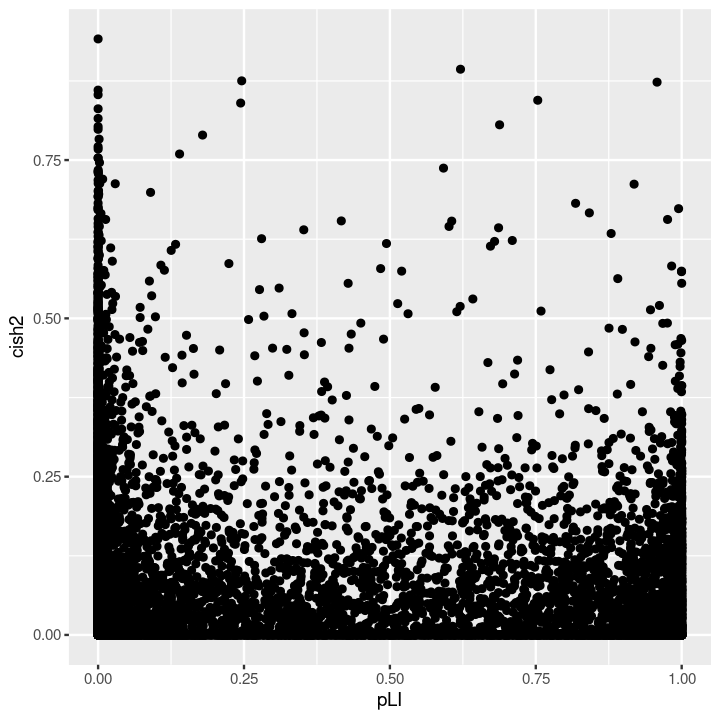

In [46]:
ggplot(df1, aes(x = pLI, y = cish2)) +
    geom_point()

In [47]:
df1 <- batch1 %>% inner_join(exac, by = c("gene" = "ensg")) %>% mutate(batch = "batch1")
df2 <- batch2 %>% inner_join(exac, by = c("gene" = "ensg")) %>% mutate(batch = "batch2")
df3 <- batch3 %>% inner_join(exac, by = c("gene" = "ensg")) %>% mutate(batch = "batch3")
df4 <- batch4 %>% inner_join(exac, by = c("gene" = "ensg")) %>% mutate(batch = "batch4")
df5 <- batch5 %>% inner_join(exac, by = c("gene" = "ensg")) %>% mutate(batch = "batch5")
df6 <- batch6 %>% inner_join(exac, by = c("gene" = "ensg")) %>% mutate(batch = "batch6")
df7 <- batch7 %>% inner_join(exac, by = c("gene" = "ensg")) %>% mutate(batch = "batch7")
df_all <- rbind(df1, df2, df3, df4, df5, df6, df7)

In [48]:
dim(df_all)
14197*7

[1] 99379    15

[1] 99379

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



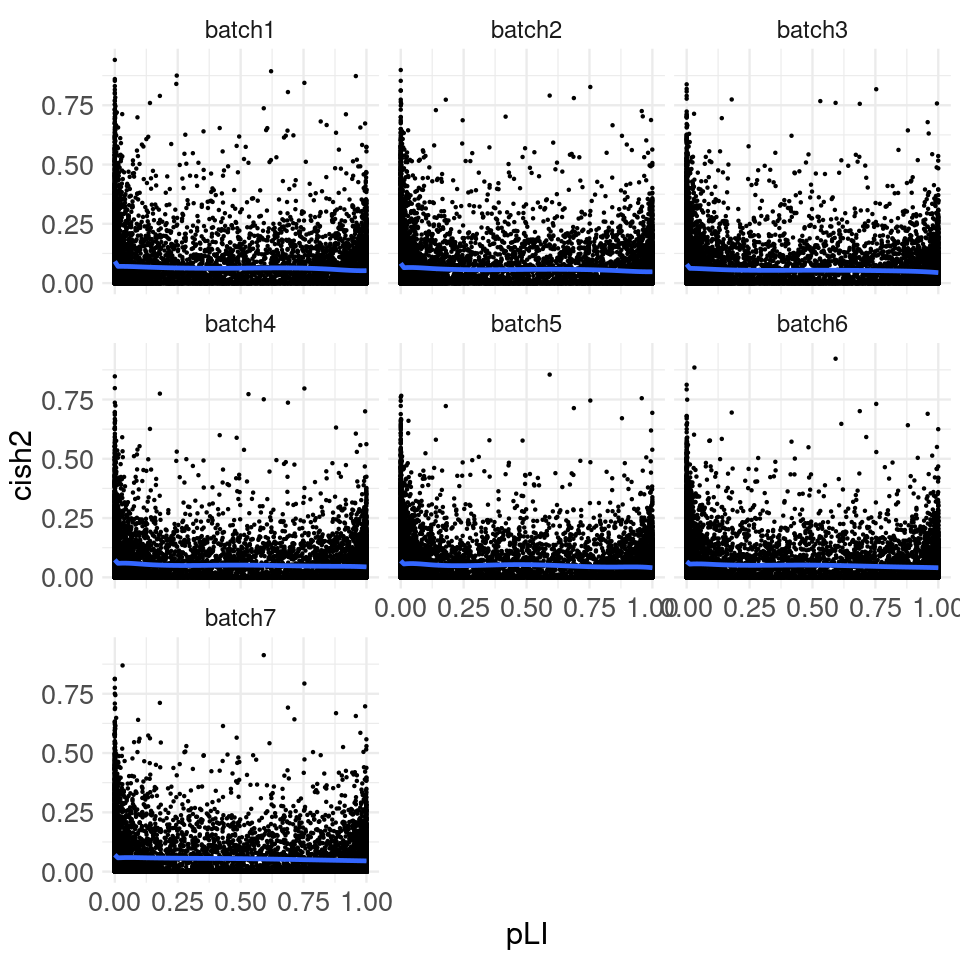

In [54]:
options(repr.plot.height = 8, repr.plot.width = 8)

ggplot(df_all, aes(x = pLI, y = cish2)) +
    geom_point(size = 0.2) +
    facet_wrap(~batch, scales = "fixed") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          strip.text.x = element_text(size = 14)) +
    geom_smooth()

[1] 13405    15

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



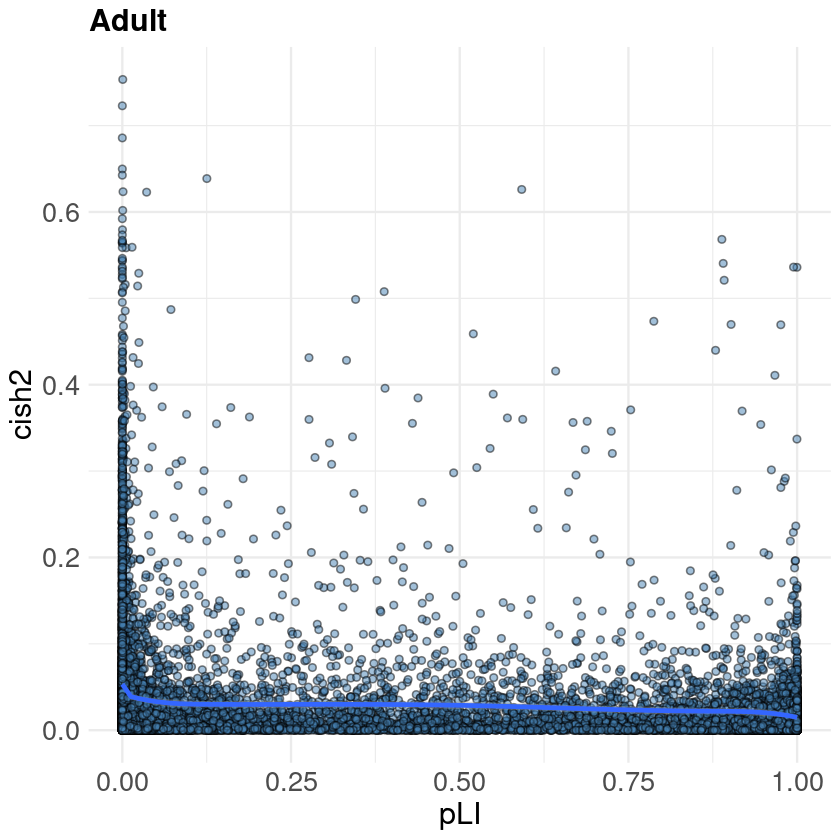

In [27]:
adult_exac <- adult %>% inner_join(exac, by = c("gene" = "ensg"))
dim(adult_exac)
ggplot(adult_exac, aes(x = pLI, y = cish2)) +
    geom_point(shape = 21, fill = "steelblue", alpha = 0.5) +
#     facet_wrap(~batch, scales = "fixed") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold")) +
    labs(title = "Adult") +
    geom_smooth()

[1] 13405    15

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



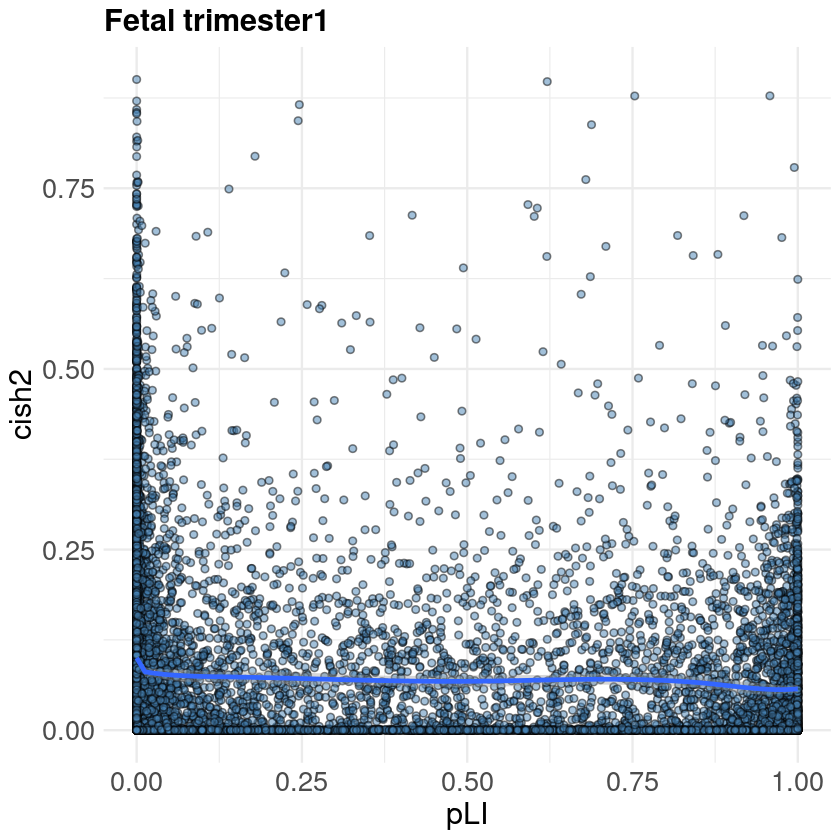

In [31]:
tri1_exac <- tri1_h2 %>% inner_join(exac, by = c("gene" = "ensg"))
dim(tri1_exac)
ggplot(tri1_exac, aes(x = pLI, y = cish2)) +
    geom_point(shape = 21, fill = "steelblue", alpha = 0.5) +
#     facet_wrap(~batch, scales = "fixed") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold")) +
    labs(title = "Fetal trimester1") +
    geom_smooth()

[1] 13405    15

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



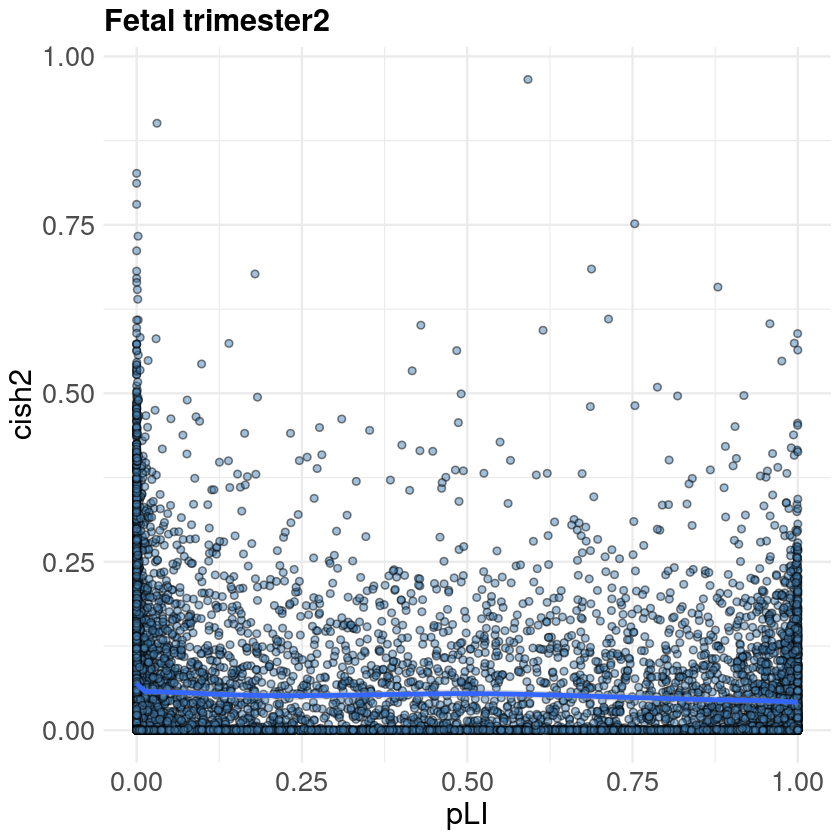

In [32]:
tri2_exac <- tri2_h2 %>% inner_join(exac, by = c("gene" = "ensg"))
dim(tri2_exac)
ggplot(tri2_exac, aes(x = pLI, y = cish2)) +
    geom_point(shape = 21, fill = "steelblue", alpha = 0.5) +
#     facet_wrap(~batch, scales = "fixed") +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold")) +
    labs(title = "Fetal trimester2") +
    geom_smooth()

In [27]:
h2_exac <- h2 %>% inner_join(exac, by = c("gene" = "ensg"))

In [40]:
length(unique(h2_exac$gene))

[1] 13405

`geom_smooth()` using formula 'y ~ x'



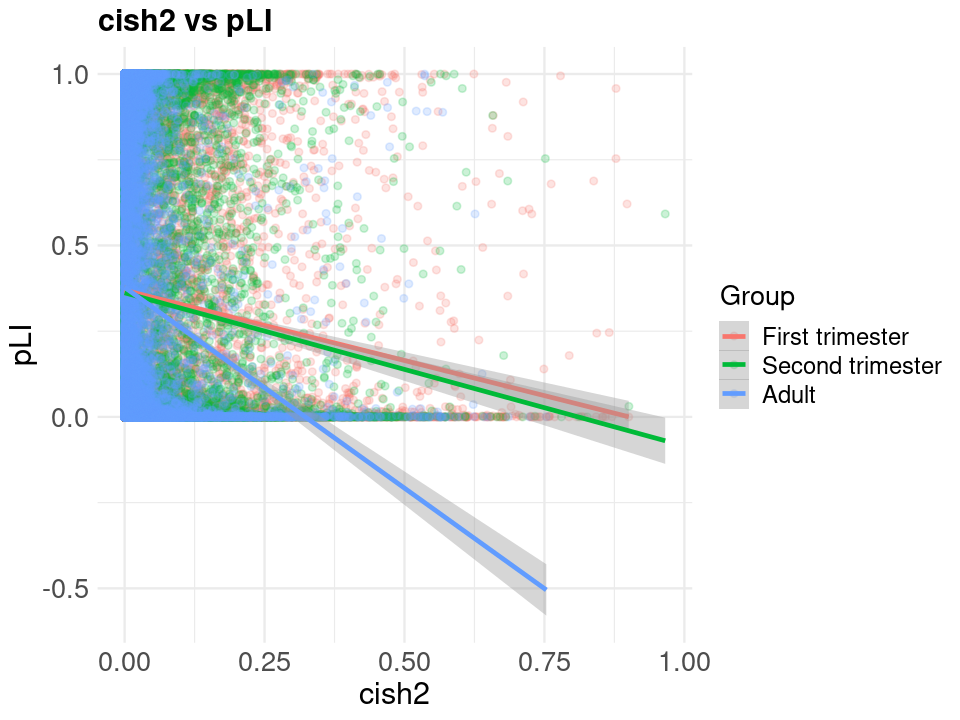

In [44]:
options(repr.plot.height = 6, repr.plot.width = 8)

ggplot(h2_exac, aes(x = cish2, y = pLI, color = Group)) +
    geom_point(alpha = 0.2) +
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          plot.title = element_text(size = 18, face = "bold"),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    labs(title = "cish2 vs pLI") +
    geom_smooth(method = "lm")

### 4: trimester specific eGene
- Looking for genes with the most different qvals in permutation output files
- Some of the top ones have small minor allele count in the trimester separate VCFs. The whole EUR file passed MAF>0.01, but some variants in the separate trimester files have small MAF. 

In [2]:
# try no covariates
expr <- fread("../data/eur/genes.280.bed.gz", data.table = F)

In [3]:
meta <- read.table("../metadata_654.tsv", header = T)
# head(meta)
meta <- meta %>% filter(Subject %in% colnames(expr))
dim(meta)
expr.gene <- expr %>% filter(ID == "ENSG00000116874") %>% select(meta$Subject)
df <- t(expr.gene) %>% as.data.frame()

[1] 280   7

In [4]:
df$trimester <- meta$trimester
table(df$trimester)


  1   2   3 
137 141   2 

In [5]:
dose.sid <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/eur/rs146862216_dose.tsv", check.names = F, header = T)
dim(dose.sid)

dose.sid <- dose.sid %>% select(meta$Subject)
dose.sid <- as.data.frame(t(dose.sid))
df$Genotype <- dose.sid[,1]

[1]   1 284

In [6]:
df$trimester <- as.factor(df$trimester)
df$Genotype <- as.factor(df$Genotype)
df <- df %>% filter(trimester %in% c(1, 2))
dim(df)

table(df$Genotype, df$trimester)

colnames(df) <- c("WARS2", "Trimester", "rs146862216")
levels(df$rs146862216) <- c(levels(df$rs146862216), "G/G", "A/G", "A/A")
df$rs146862216[df$rs146862216 == 0] <- 'G/G'
df$rs146862216[df$rs146862216 == 1] <- 'A/G'
df$rs146862216[df$rs146862216 == 2] <- 'A/A'

[1] 278   3

   
     1  2  3
  0 82 78  0
  1 51 57  0
  2  4  6  0

In [9]:
df$geno.num <- as.numeric(df$rs146862216)-3
df$geno.fac <- factor(df$geno.num)

`geom_smooth()` using formula 'y ~ x'



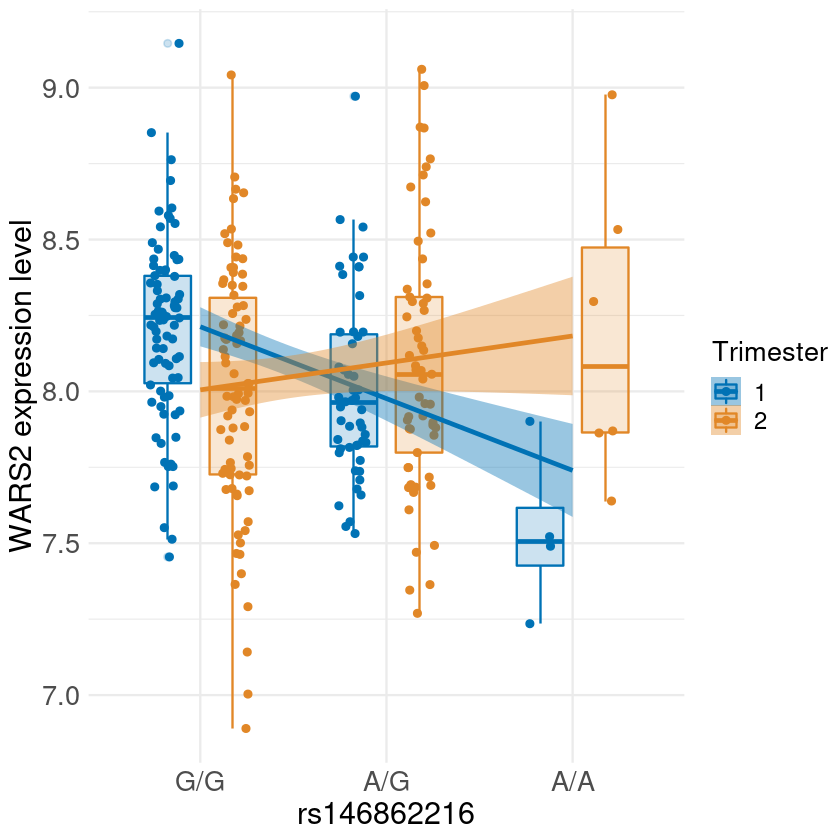

In [14]:
ggplot(df, aes(x = geno.num, y = WARS2, fill = Trimester, color = Trimester)) +
    geom_boxplot(aes(x = geno.fac), 
                 alpha = 0.2, width = 0.5, position = position_dodge(width = 0.7)) + 
    geom_point(position = position_jitterdodge()) +
    geom_smooth(method = "lm", fullrange = TRUE) +
    labs(y = "WARS2 expression level", x = "rs146862216") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_fill_manual(values = c("#0072B5FF", "#E18727FF")) +
    scale_color_manual(values = c("#0072B5FF", "#E18727FF")) +
    scale_x_discrete(labels = c("1" = "G/G", "2" = "A/G", "3" = "A/A"))

In [15]:
ggsave("../figures/WARS2.pdf", height = 6, width = 6)

`geom_smooth()` using formula 'y ~ x'



**Regressed expression**

In [ ]:
expr <- fread("../../TWAS/data/eur_gene_exp_regressed.txt", data.table = F)

In [3]:
meta <- read.table("../metadata_654.tsv", header = T)
# head(meta)
meta <- meta %>% filter(Subject %in% colnames(expr))

In [4]:
expr.gene <- expr %>% filter(TargetID == "ENSG00000116874") %>% select(meta$Subject)
df <- t(expr.gene) %>% as.data.frame()

In [5]:
df$trimester <- meta$trimester
table(df$trimester)


  1   2   3 
137 141   2 

In [6]:
# dose.sid <- dose %>% filter(CHROM == 1, POS == 119600175)
dose.sid <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/eur/rs146862216_dose.tsv", check.names = F, header = T)

dose.sid <- dose.sid %>% select(meta$Subject)
dose.sid <- as.data.frame(t(dose.sid))
df$Genotype <- dose.sid[,1]

In [7]:
df$trimester <- as.factor(df$trimester)
df$Genotype <- as.factor(df$Genotype)
df <- df %>% filter(trimester %in% c(1, 2))
dim(df)

[1] 278   3

In [8]:
table(df$Genotype, df$trimester)

   
     1  2  3
  0 82 78  0
  1 51 57  0
  2  4  6  0

In [9]:
colnames(df) <- c("WARS2", "Trimester", "rs146862216")

In [10]:
levels(df$rs146862216) <- c(levels(df$rs146862216), "G/G", "A/G", "A/A")
df$rs146862216[df$rs146862216 == 0] <- 'G/G'
df$rs146862216[df$rs146862216 == 1] <- 'A/G'
df$rs146862216[df$rs146862216 == 2] <- 'A/A'

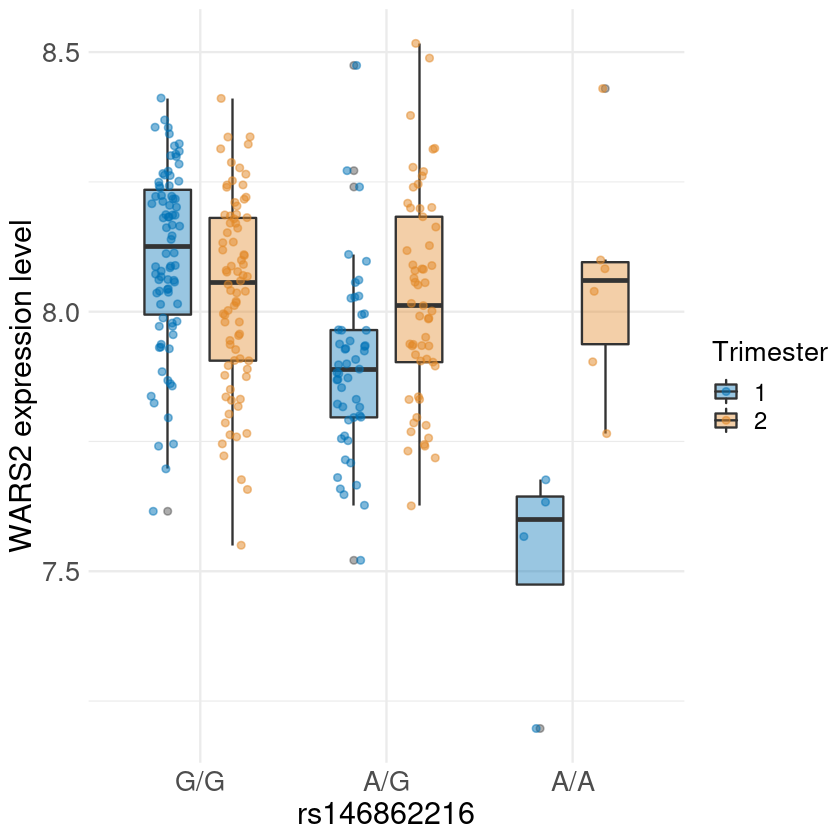

In [13]:
ggplot(df, aes(x = rs146862216, y = WARS2, fill = Trimester)) +
    geom_boxplot(aes(fill = Trimester), 
                 alpha = 0.4, width = 0.5, position = position_dodge(width = 0.7)) + 
#     geom_smooth(aes(as.numeric(rs146862216), WARS2, color = Trimester), method = "lm") 
    geom_point(aes(color = Trimester), 
               position = position_jitterdodge(),
               alpha = 0.5) +
    labs(y = "WARS2 expression level") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.title = element_text(size = 16),
          legend.text = element_text(size = 14)) +
    scale_fill_manual(values = c("#0072B5FF", "#E18727FF")) +
    scale_color_manual(values = c("#0072B5FF", "#E18727FF"))

In [14]:
ggsave("../figures/WARS2.pdf", height = 6, width = 6)

### 5: aFC

In [2]:
tri1 <- read.table("../results/eur_trimester/aFC/tri1.txt", header = T)
# tri1 <- tri1 %>% filter(pid != "pid")
# dim(tri1)
# write.table(tri1, "../results/eur_trimester/aFC/tri1.txt", col.names=T,row.names=F,quote=F, sep="\t")

[1] 4211   18

In [3]:
tri2 <- read.table("../results/eur_trimester/aFC/tri2.txt", header = T)
# tri2 <- tri2 %>% filter(pid != "pid")
# dim(tri2)
# write.table(tri2, "../results/eur_trimester/aFC/tri2.txt", col.names=T,row.names=F,quote=F, sep="\t")

[1] 2220   18

In [5]:
tri1 <- tri1 %>% unite(pair, pid, sid, sep=":")
tri2 <- tri2 %>% unite(pair, pid, sid, sep=":")

In [6]:
df <- tri1 %>% inner_join(tri2, by = "pair")
dim(df)

[1] 222  33

In [17]:
cols.num <- c("log2_aFC.x", "log2_aFC_lower.x", "log2_aFC_upper.x",
              "log2_aFC.y", "log2_aFC_lower.y", "log2_aFC_upper.y")
df[cols.num] <- sapply(df[cols.num],as.numeric)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing missing values (geom_segment).”


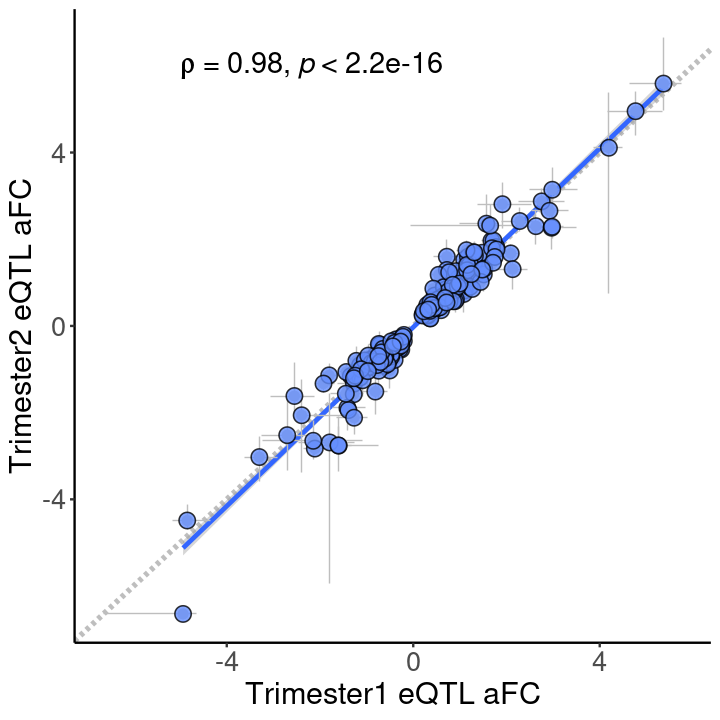

In [20]:
options(repr.plot.height = 6, repr.plot.width = 6)

ggplot(df, aes(x = log2_aFC.x, y = log2_aFC.y)) +
    geom_abline(intercept = 0, slope = 1, color = "grey", linetype = "dashed", size = 1.2) +
    geom_smooth(method = "lm") +
    geom_pointrange(aes(xmin = log2_aFC_lower.x, xmax = log2_aFC_upper.x), 
                  colour = "grey", size = .3) +
    geom_pointrange(aes(ymin = log2_aFC_lower.y, ymax = log2_aFC_upper.y), 
                  colour = "grey", size = .3) +
    geom_point(size = 4, fill = "#648FFF", shape = 21, alpha = 0.8) +
    labs(x = "Trimester1 eQTL aFC", y = "Trimester2 eQTL aFC") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18)) +
    stat_cor(method = "spearman", label.x = -5, label.y = 6, cor.coef.name = "rho", size = 6)

In [21]:
ggsave("../figures/tri_aFC.pdf", height = 6, width = 6)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing missing values (geom_segment).”


### Old results
- Using trimester-specific covariates

In [20]:
tri1_h2 <- fread("/u/project/gandalm/danieldu/gcta/data/Trimester_1_EUR_25_HPC_gene_filtered_1Mbase_window/output/results/all_variance.txt", data.table = F)
tri2_h2 <- fread("/u/project/gandalm/danieldu/gcta/data/Trimester_2_EUR_15_HPC_gene_filtered_1Mbase_window/output/results/all_variance.txt", data.table = F)
adult <- fread("/u/project/gandalm/danieldu/gcta/data/EUR_SPC_gene_HRC_1Mbase_window/output/results/all_variance.txt", data.table = F)

In [21]:
shared <- Reduce(intersect, list(tri1_h2$ID, tri2_h2$ID, adult$ID))

In [22]:
tri1_h2 <- tri1_h2 %>% filter(ID %in% shared)
tri2_h2 <- tri2_h2 %>% filter(ID %in% shared)
adult <- adult %>% filter(ID %in% shared)

In [23]:
dim(tri1_h2)
dim(tri2_h2)
dim(adult)

[1] 21224    17

[1] 21224    17

[1] 21224    17

In [24]:
tri1_h2$Group <- "Tri1"
tri2_h2$Group <- "Tri2"
adult$Group <- "Adult"

In [50]:
h2 <- rbind(tri1_h2, tri2_h2, adult)

Warning message:
“Ignoring unknown parameters: outlier.shape”
Warning message:
“Removed 7472 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 7472 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 7472 rows containing non-finite values (stat_summary).”


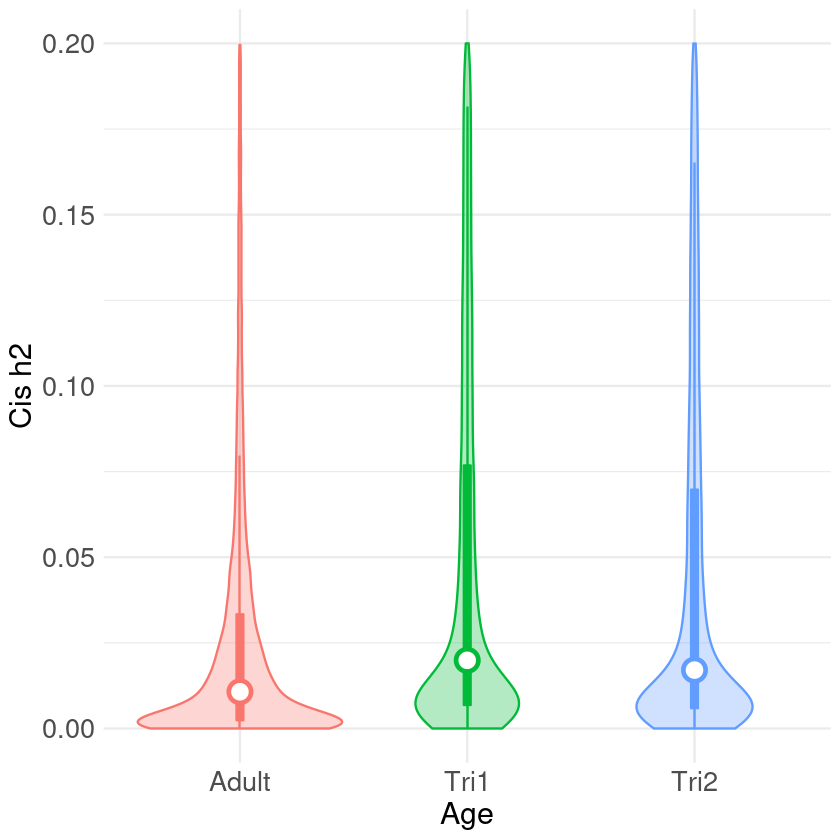

In [38]:
ggplot(h2, aes(x = Group, y = Cis_h2, fill = Group)) +
    geom_violin(alpha = 0.3, trim = TRUE, aes(color = Group), outlier.shape=NA) +
    geom_boxplot(width = 0.03, aes(color = Group), outlier.shape=NA) +
    labs(x = "Age", y = "Cis h2") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") +
#     scale_fill_manual(values = c("#46ACC8", "#E58601")) +
#     scale_color_manual(values = c("#46ACC8", "#E58601")) +
    stat_summary(fun = median, aes(color = Group), geom = "point", 
                         shape = 21, size = 5, show.legend = FALSE, fill = "white", stroke = 1.5) +
    ylim(0, 0.2)
#     geom_signif(
#         comparisons = list(c("Trimester 1", "Trimester 2")),
#         annotation = "Wilcoxon, p < 2.2e-16",
#         textsize = 5
#   )

In [28]:
# ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/tri_adult.pdf", height = 5, width = 5)

In [51]:
h2$Group <- factor(h2$Group, levels = c("Adult", "Tri2", "Tri1"))

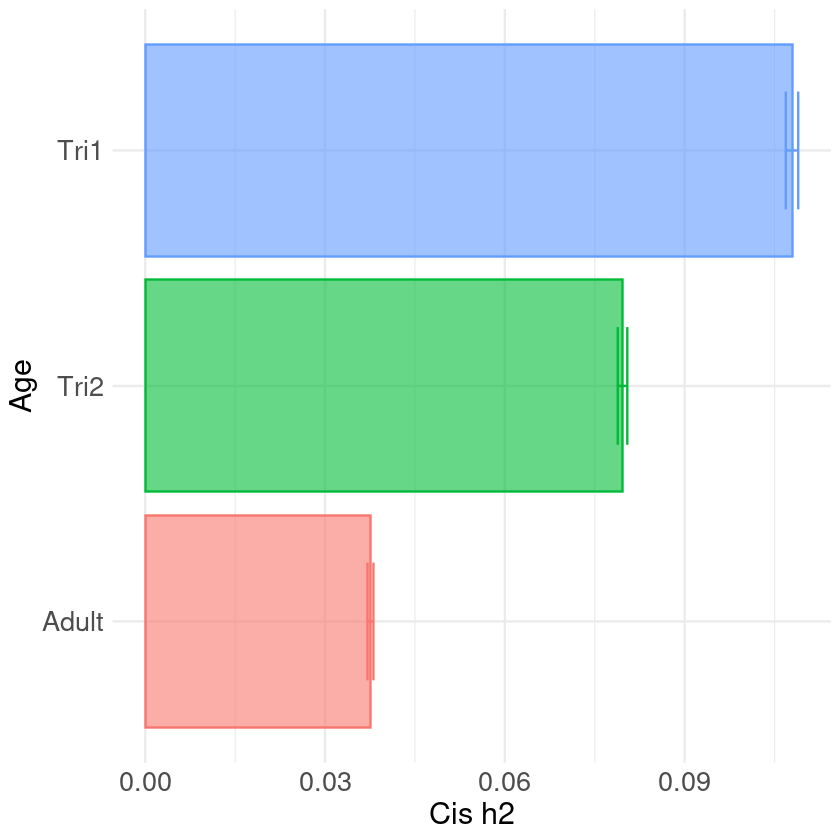

In [60]:
ggplot(h2, aes(x = Cis_h2, y = Group, fill = Group, color = Group)) +
    stat_summary(fun.data = mean_se, position=position_dodge(0.95), geom="errorbar", width = .5, aes(color=Group)) + 
  stat_summary(fun = mean, position = position_dodge(width=0.95), geom = "bar", alpha = 0.6)+
    labs(x = "Cis h2", y = "Age") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") 

In [29]:
# ggsave("~/project-gandalm/isoform_twas/eqtl_new/figures/tri_adult_h2.pdf", height = 3, width = 3)

In [14]:
sum(tri1_h2$P_val < 0.05)
sum(tri2_h2$P_val < 0.05)
sum(adult$P_val < 0.05)

[1] 3166

[1] 2084

[1] 6750

In [15]:
tri1_sig <- tri1_h2 %>% filter(P_val < 0.05)
tri2_sig <- tri2_h2 %>% filter(P_val < 0.05)
adult_sig <- adult %>% filter(P_val < 0.05)

In [17]:
sum(tri1_sig$ID %in% tri2_sig$ID) #12
sum(tri1_sig$ID %in% adult_sig$ID) #13
sum(tri2_sig$ID %in% adult_sig$ID)#23
length(Reduce(intersect, list(unique(tri1_sig$ID),
                              unique(tri2_sig$ID),
                              unique(adult_sig$ID)))) #n123

[1] 907

[1] 1465

[1] 948

[1] 593

png 
  2

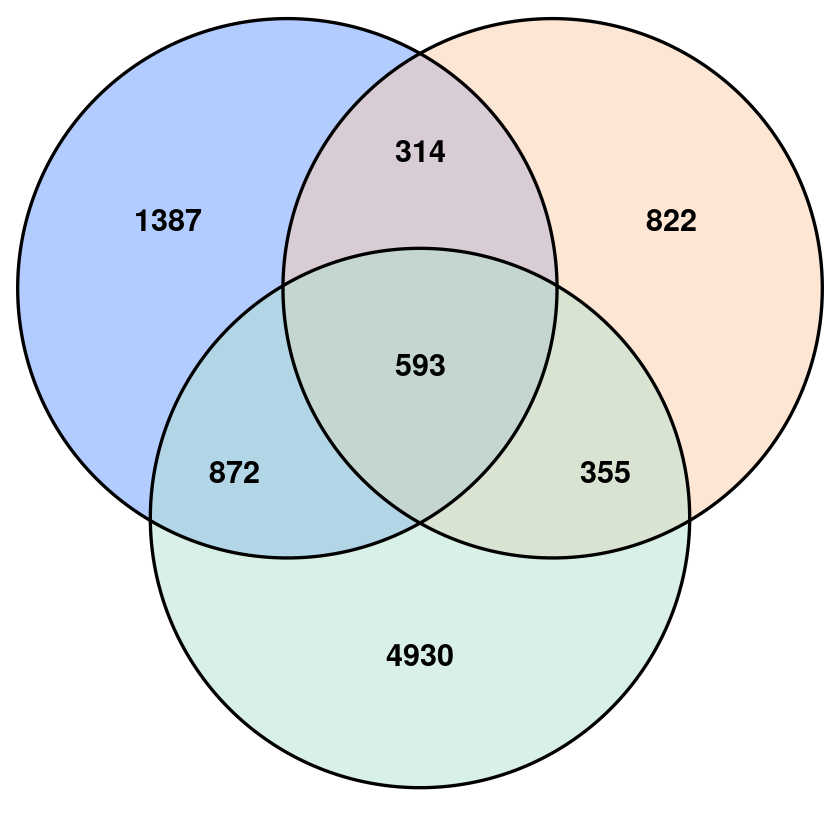

In [18]:
myCol <- c("#6699FF", "#fdcdac", "#b3e2cd")
# area1, area2, area3, n12, n23, n13, n123
venn.plot <- draw.triple.venn(3166, 2084, 6750, 907, 948, 1465, 593, 
                              fill = myCol,
                              alpha = c(.5,.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",7),
                              category = c("", "", ""), 
                              scaled = TRUE)
pdf("../../eqtl_new/figures/tri_h2.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

In [ ]:
sum(tri1_h2$Cis_h2 > 0.05)
sum(tri2_h2$Cis_h2 > 0.05)
sum(adult$Cis_h2 > 0.05)

tri1_sig <- tri1_h2 %>% filter(P_val < 0.05)
tri2_sig <- tri2_h2 %>% filter(P_val < 0.05)
adult_sig <- adult %>% filter(P_val < 0.05)

png 
  2

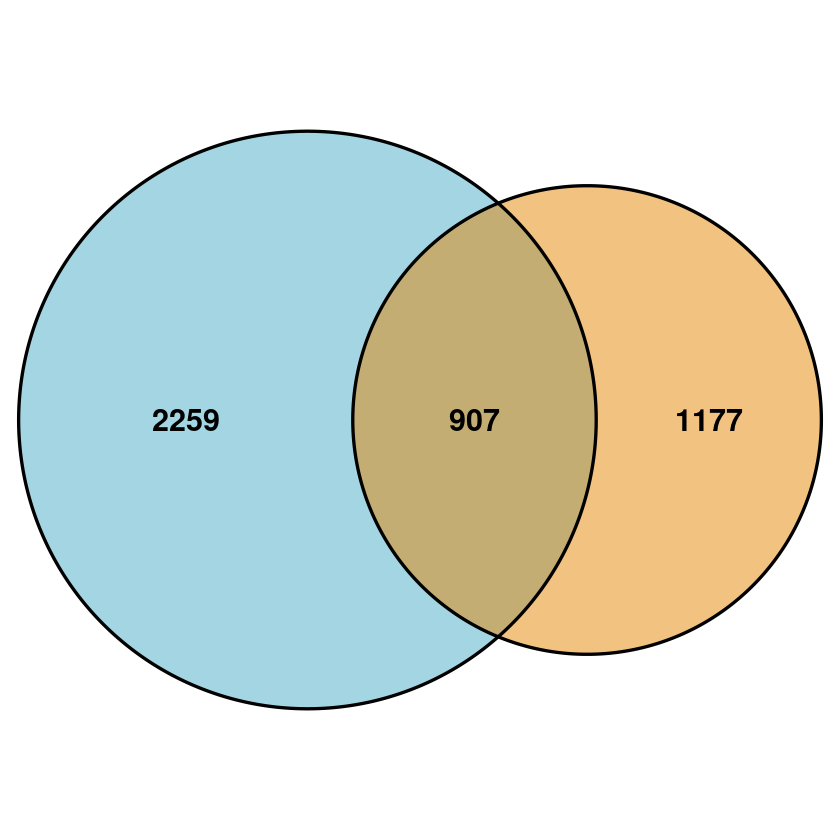

In [11]:
# area1, area2, n12
venn.plot <- draw.pairwise.venn(3166, 2084, 907, 
                              fill = c("#46ACC8", "#E58601"),
                              alpha = c(.5,.5),
                              cex = 1.5,
                              fontface = 2,
                              fontfamily = rep("sans",3),
                              category = c("", ""), 
                              scaled = TRUE,
                              )
pdf("../../eqtl_new/figures/tri_h2.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

In [3]:
tri1 <- tri1_h2 %>% inner_join(tri2_h2, by = "ID") %>% select(ID, Cis_h2.x, Trans_h2.x, SNP_h2.x)
tri2 <- tri2_h2 %>% inner_join(tri1_h2, by = "ID") %>% select(ID, Cis_h2.x, Trans_h2.x, SNP_h2.x)

In [4]:
h2 <- rbind(tri1, tri2)
h2$group <- c(rep("Trimester 1", nrow(tri1)), rep("Trimester 2", nrow(tri2)))

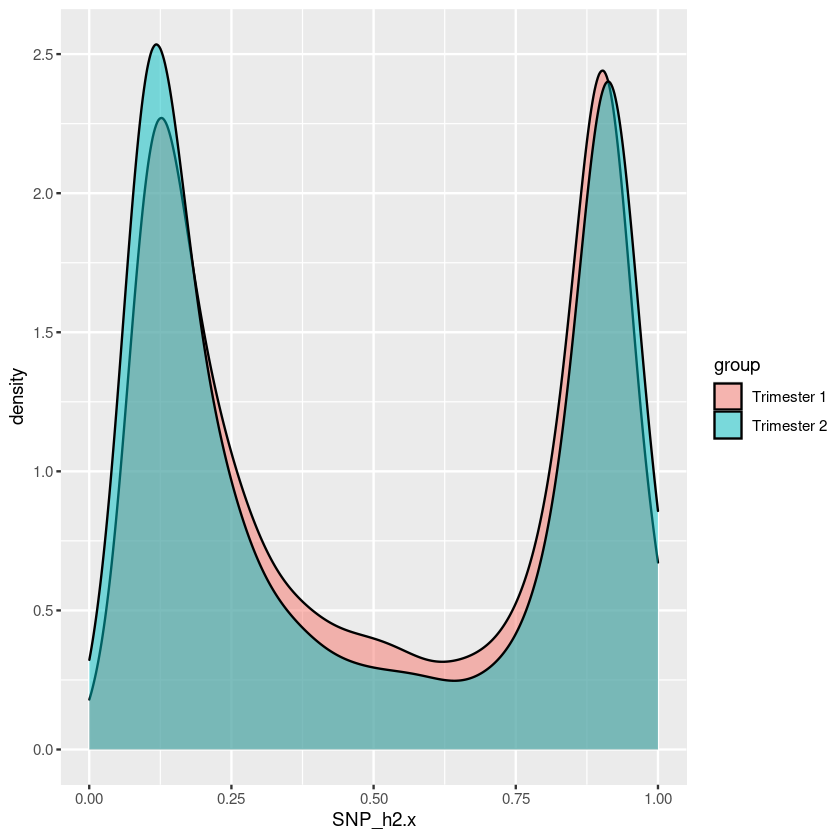

In [7]:
p <- ggplot(h2, aes(x = SNP_h2.x, fill = group)) +
    geom_density(alpha = 0.5)
p

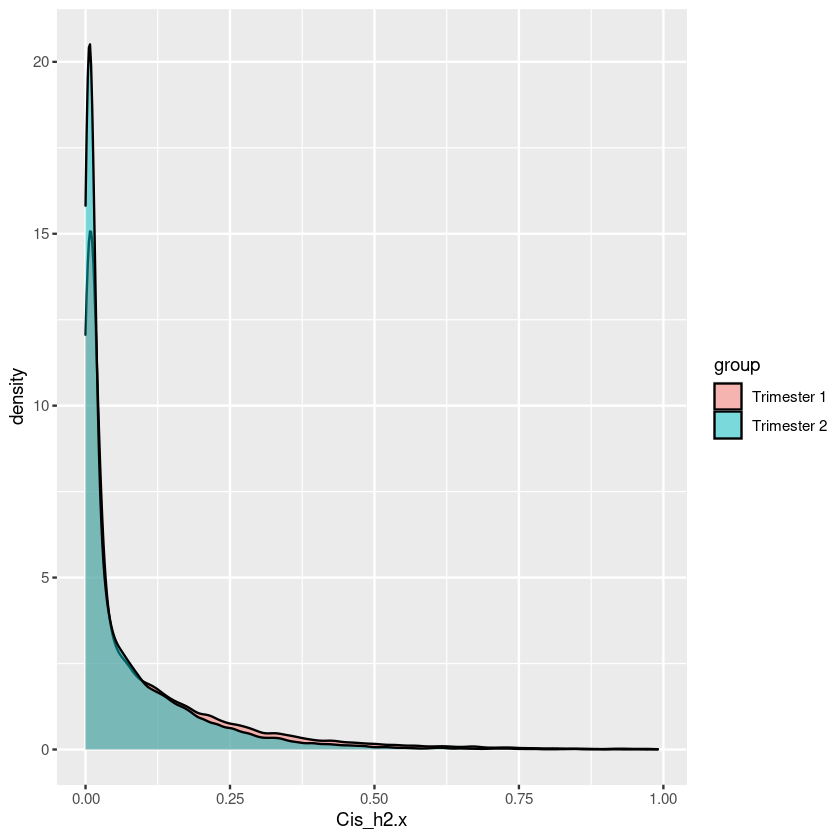

In [5]:
p <- ggplot(h2, aes(x = Cis_h2.x, fill = group)) +
    geom_density(alpha = 0.5)
p

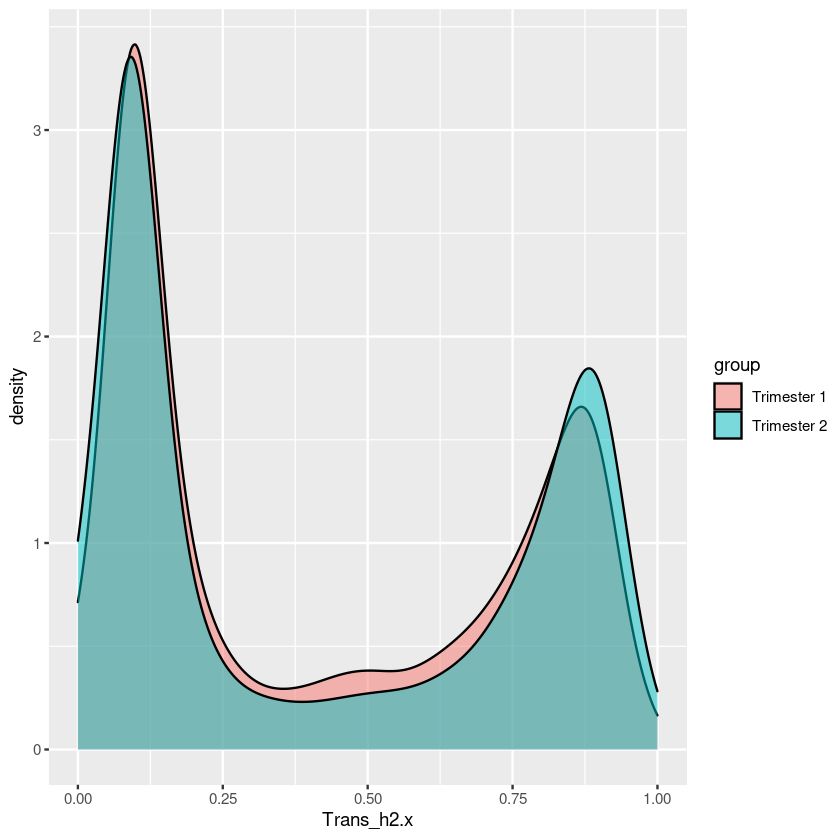

In [16]:
p <- ggplot(h2, aes(x = Trans_h2.x, fill = group)) +
    geom_density(alpha = 0.5)
p

In [17]:
dim(tri1_h2)
dim(tri2_h2)

[1] 31523    17

[1] 31531    17

In [18]:
mean(tri1_h2$Cis_h2)
mean(tri2_h2$Cis_h2)
median(tri1_h2$Cis_h2)
median(tri2_h2$Cis_h2)

[1] 0.09872257

[1] 0.07390155

[1] 0.03183

[1] 0.02222

In [19]:
wilcox.test(tri1_h2$Cis_h2, tri2_h2$Cis_h2, alternative = "two.sided")


	Wilcoxon rank sum test with continuity correction

data:  tri1_h2$Cis_h2 and tri2_h2$Cis_h2
W = 543086462, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


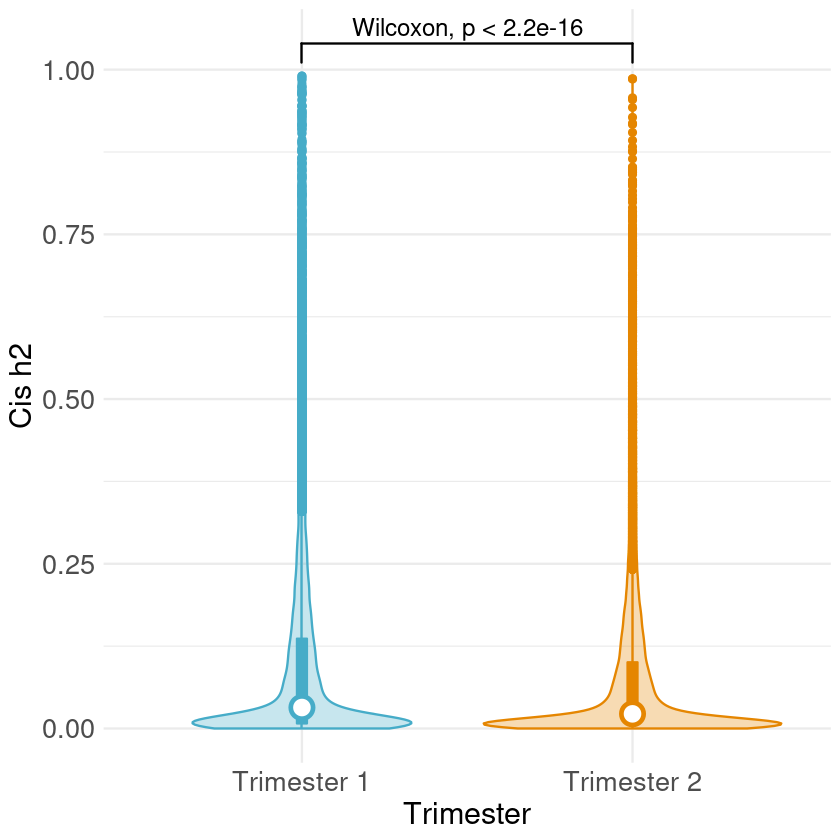

In [15]:
p <- ggplot(h2, aes(x = group, y = Cis_h2.x, fill = group)) +
    geom_violin(alpha = 0.3, trim = TRUE, aes(color = group)) +
    geom_boxplot(width = 0.03, aes(color = group)) +
    labs(x = "Trimester", y = "Cis h2") + 
    theme_minimal() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18),
          legend.position = "none") +
    scale_fill_manual(values = c("#46ACC8", "#E58601")) +
    scale_color_manual(values = c("#46ACC8", "#E58601")) +
    stat_summary(fun = median, aes(color = group), geom = "point", 
                         shape = 21, size = 5, show.legend = FALSE, fill = "white", stroke = 1.5) +
    geom_signif(
        comparisons = list(c("Trimester 1", "Trimester 2")),
        annotation = "Wilcoxon, p < 2.2e-16",
        textsize = 5
  )

p

In [16]:
ggsave("../figures/tri_cis_h2.pdf", width = 6, height = 6)

In [8]:
h2_scatter <- tri1 %>% inner_join(tri2, by = "ID")
head(h2_scatter)

ID              Cis_h2.x.x Trans_h2.x.x SNP_h2.x.x Cis_h2.x.y Trans_h2.x.y
1 ENSG00000000419 0.038493   0.088488     0.126981   0.040520   0.061355    
2 ENSG00000000457 0.032494   0.967503     0.999997   0.081111   0.073336    
3 ENSG00000000460 0.252903   0.348582     0.601485   0.304154   0.073436    
4 ENSG00000000938 0.140592   0.189627     0.330219   0.006086   0.142409    
5 ENSG00000000971 0.008842   0.884188     0.893030   0.018635   0.900914    
6 ENSG00000001036 0.007206   0.514717     0.521923   0.013204   0.859694    
  SNP_h2.x.y
1 0.101875  
2 0.154447  
3 0.377590  
4 0.148495  
5 0.919549  
6 0.872899

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



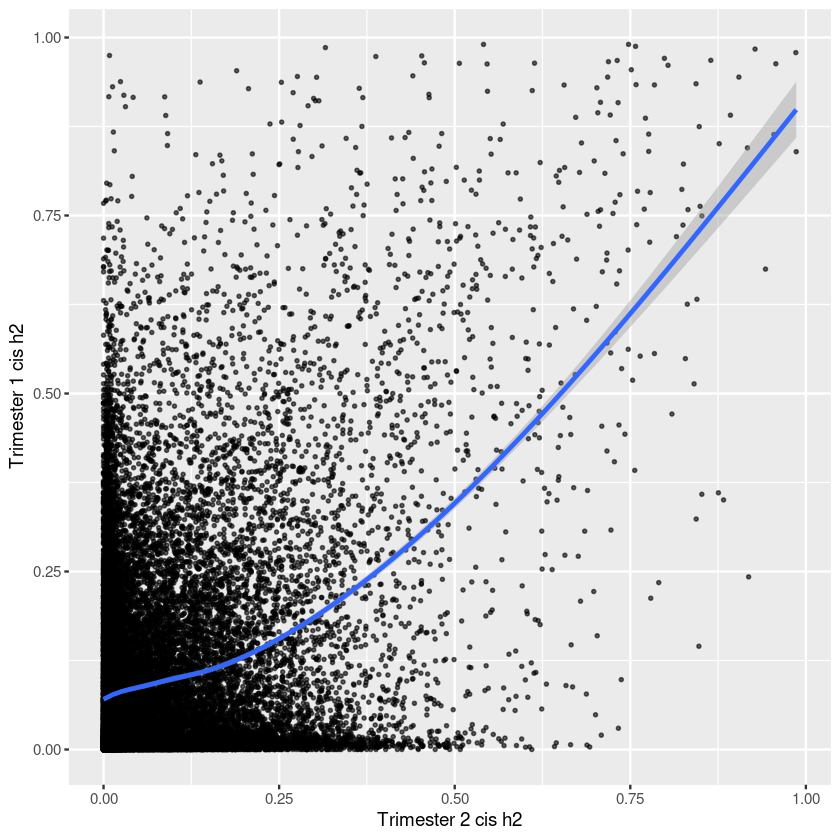

In [12]:
p <- ggplot(h2_scatter, aes(y = Cis_h2.x.x, x = Cis_h2.x.y)) +
    geom_point(alpha = 0.6, size = 0.5) +
    geom_smooth() +
    labs(x = "Trimester 2 cis h2", y = "Trimester 1 cis h2")
p